In [460]:
#!pip install matplotlib

In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [462]:
walmart = pd.read_csv('train.csv/train.csv')

walmart_feature = pd.read_csv('features.csv')

walmart_store = pd.read_csv('stores.csv')

In [463]:
walmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [464]:
walmart.shape

(421570, 5)

## Group by Store

Since we are am predicting the weekly sales for Store level, we will grouping the data in walmart dataset to avoid the department and take the sum of department sales to store level.

In [465]:
walmart_store_group=walmart.groupby(["Store","Date"])[["Weekly_Sales"]].sum()
walmart_store_group.reset_index(inplace=True)

##### Merging all the datasets into one place for easier test and analysis.

In [466]:
result = pd.merge(walmart_store_group, walmart_store, how='inner', on='Store', left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)

data = pd.merge(result, walmart_feature, how='inner', on=['Store','Date'], left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)

In [467]:
print(data.shape)

(6435, 15)



## DATA CLEANING

In [468]:
data.head()

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [469]:
#let's encode the categorical column : IsHoliday

data['IsHoliday'] = data['IsHoliday'].apply(lambda x: 1 if x == True else 0)
# Will convert the bool to 1 and 0 for easier use later.
#data.IsHoliday=data.IsHoliday.map(lambda x: 1 if x==True else 0)

In [470]:
# Want to check the date column is in object format or datetime
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday         int64
dtype: object

In [471]:
import calendar
# yes my assumption was correct python have something to do with date format. 
# Now converting "Date"  to date time
data["Date"]=pd.to_datetime(data.Date)

# Extracting details from date given. so that can be used for seasonal checks or grouping

data["Day"]=data.Date.dt.day
data["Month"]=data.Date.dt.month
data["Year"]=data.Date.dt.year

# Changing the Months value from numbers to real values like Jan, Feb to Dec
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

In [472]:
# Lets look into the null values
data.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Type               0
Size               0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Day                0
Month              0
Year               0
dtype: int64

In [473]:
#will create this column for later use
#data['MarkdownsSum'] = data['MarkDown1'] + data['MarkDown2'] + data['MarkDown3'] + data['MarkDown4'] + data['MarkDown5'] 

In [474]:
#data.fillna(0, inplace = True)

In [475]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Size,6435.0,130287.6,34875.0,70713.0,126512.0,202307.0,219622.0,63117.022465
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
MarkDown1,2280.0,6855.58743,0.27,1679.19,4972.59,8873.5825,88646.76,8183.310015
MarkDown2,1637.0,3218.965504,-265.76,37.2,187.04,1785.29,104519.54,9268.082387
MarkDown3,2046.0,1349.853021,-29.1,4.7,22.7,99.9875,141630.61,9287.2428
MarkDown4,1965.0,3303.858142,0.22,483.27,1419.42,3496.08,67474.85,6211.203947


In [476]:
#add a 'week' column to the dataset for further analysis
data['Week'] = data.Date.dt.isocalendar().week 

In [477]:
data['MarkDown1'].isnull().sum()

np.int64(4155)

## EDA

In [478]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Store,6435.000000,23.000000,12.988182,1.000000,12.000000,23.000000,34.000000,45.000000
Weekly_Sales,6435.000000,1046964.877562,564366.622054,209986.250000,553350.105000,960746.040000,1420158.660000,3818686.450000
Size,6435.000000,130287.600000,63117.022465,34875.000000,70713.000000,126512.000000,202307.000000,219622.000000
Temperature,6435.000000,60.663782,18.444933,-2.060000,47.460000,62.670000,74.940000,100.140000
Fuel_Price,6435.000000,3.358607,0.459020,2.472000,2.933000,3.445000,3.735000,4.468000
MarkDown1,2280.000000,6855.587430,8183.310015,0.270000,1679.190000,4972.590000,8873.582500,88646.760000
MarkDown2,1637.000000,3218.965504,9268.082387,-265.760000,37.200000,187.040000,1785.290000,104519.540000
MarkDown3,2046.000000,1349.853021,9287.242800,-29.100000,4.700000,22.700000,99.987500,141630.610000
MarkDown4,1965.000000,3303.858142,6211.203947,0.220000,483.270000,1419.420000,3496.080000,67474.850000
MarkDown5,2295.000000,4435.262240,5868.933325,135.160000,1702.565000,3186.520000,5422.080000,108519.280000


In [479]:
#!pip install plotly

In [480]:
#!pip install nbformat

In [481]:
numeric_data_week = numeric_data.groupby('Week').sum()

import plotly.express as px
fig = px.line( data_frame = numeric_data_week, x = numeric_data_week.index, y = 'Weekly_Sales', labels = {'Weekly_Sales' : 'Weekly Sales', 'x' : 'Weeks' }, title = 'Sales over weeks')
fig.update_traces(line_color='deeppink', line_width=3)

# Add this line to save the figure as an HTML file
fig.write_html("sales_over_weeks.html")

In [482]:
numeric_data_week.head()

,Store,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Year
Week,,,,,,,,,,,,,,,
1,2070,8.773121e+07,11725884,3438.27,287.489,214551.50,956964.10,5105.11,44069.57,223036.75,15421.135275,710.979,0,585,181035
2,2070,8.269676e+07,11725884,3167.09,291.404,148560.51,420168.49,3172.06,22332.89,165721.27,15430.151991,710.979,0,1215,181035
3,2070,8.273564e+07,11725884,3476.88,293.341,104001.81,141268.63,3098.39,27717.05,122143.56,15443.190027,710.979,0,1845,181035
4,2070,7.943483e+07,11725884,3455.57,294.581,63331.86,74200.84,3089.75,4254.13,116290.60,15456.228061,710.979,0,2475,181035
5,3105,1.419895e+08,17588826,4919.52,418.696,1624211.71,126542.47,6408.63,1286593.08,267767.25,23017.155918,1098.848,0,540,271485


In [483]:
import plotly.graph_objs as go
from plotly import tools

fig = go.Figure()

#fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly Sales', mode = 'lines') )
fig.add_trace(go.Scatter( x = numeric_data_week.index, y = numeric_data_week['MarkDown1'], name = 'MarkDown1', mode = 'lines') )
fig.add_trace(go.Scatter( x = numeric_data_week.index, y = numeric_data_week['MarkDown2'], name = 'MarkDown2', mode = 'lines') )
fig.add_trace(go.Scatter( x = numeric_data_week.index, y = numeric_data_week['MarkDown3'], name = 'MarkDown3', mode = 'lines') )
fig.add_trace(go.Scatter( x = numeric_data_week.index, y = numeric_data_week['MarkDown4'], name = 'MarkDown4', mode = 'lines') )
fig.add_trace(go.Scatter( x = numeric_data_week.index, y = numeric_data_week['MarkDown5'], name = 'MarkDown5', mode = 'lines') )

fig.update_layout(title = 'Sales vs Markdown', xaxis_title = 'Weeks')

In [484]:
## setting all missing values in markdown columns to -500 for now. We will treat them later while performing Feature scaling
data['MarkDown1'].fillna(-500, inplace=True)
data['MarkDown2'].fillna(-500, inplace=True)
data['MarkDown3'].fillna(-500, inplace=True)
data['MarkDown4'].fillna(-500, inplace=True)
data['MarkDown5'].fillna(-500, inplace=True)


C:\Users\kmishra\AppData\Local\Temp\ipykernel_17056\3267398955.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\kmishra\AppData\Local\Temp\ipykernel_17056\3267398955.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [485]:
#!pip install seaborn

<Figure size 1000x600 with 0 Axes>

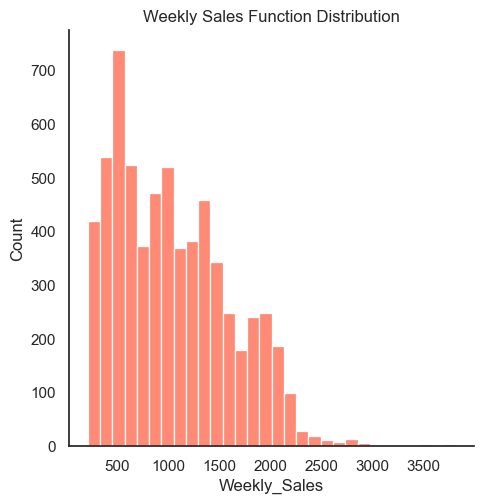

In [486]:
# From the Describe function we see that weekly sales for each store are very high. 
# we will scale down the value for ease of use and revert back when we look residuals or where necessary
import seaborn as sns
plt.figure(figsize=(10, 6))
data["Weekly_Sales"]=data.Weekly_Sales/1000

sns.displot(data.Weekly_Sales, kde=False, bins=30, color = 'tomato')
plt.title('Weekly Sales Function Distribution')
plt.show()

In the Distribution, natural Log of Sales and the square root of Sales look better distributed. We can use Natural Log for predictions later

In [487]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(data[column] , data['Weekly_Sales'], color = 'turquoise')
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)

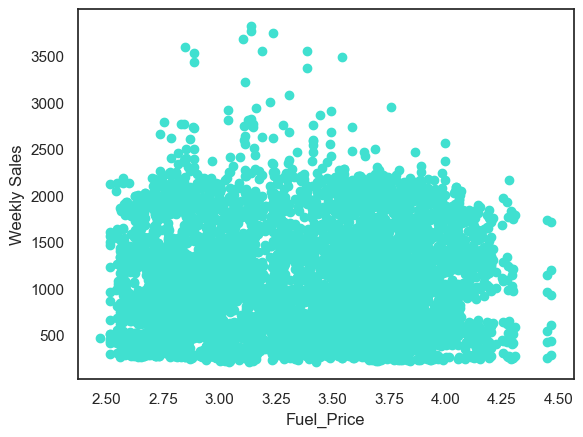

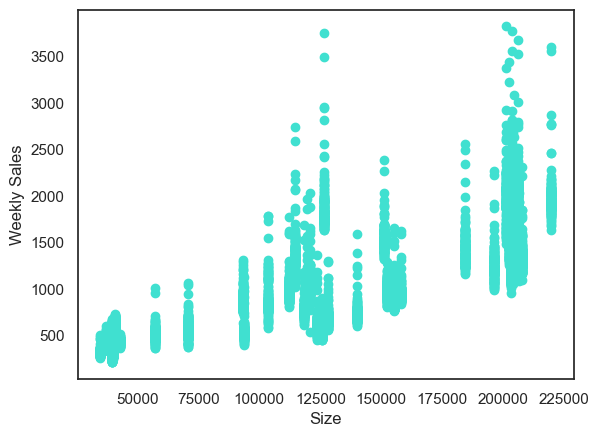

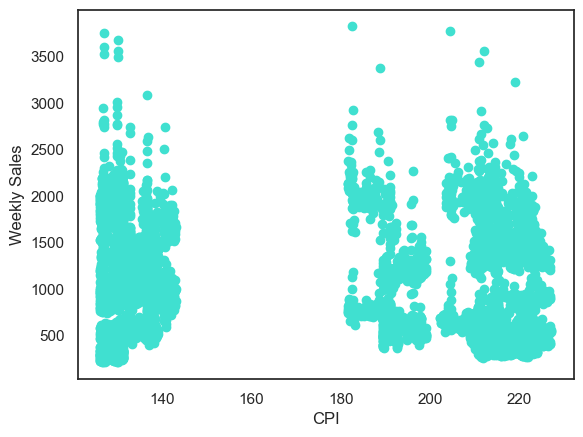

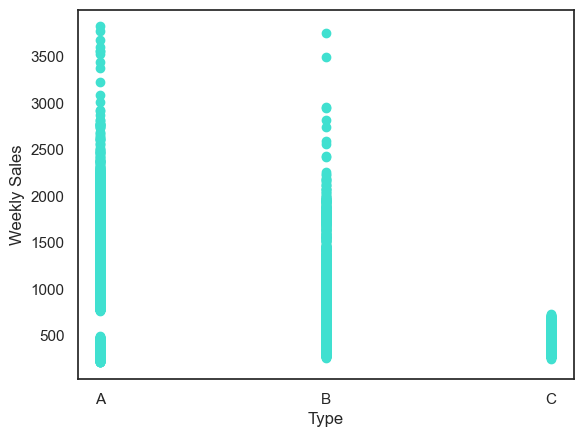

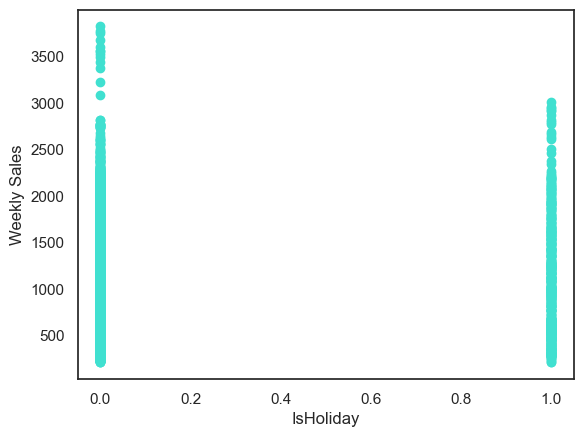

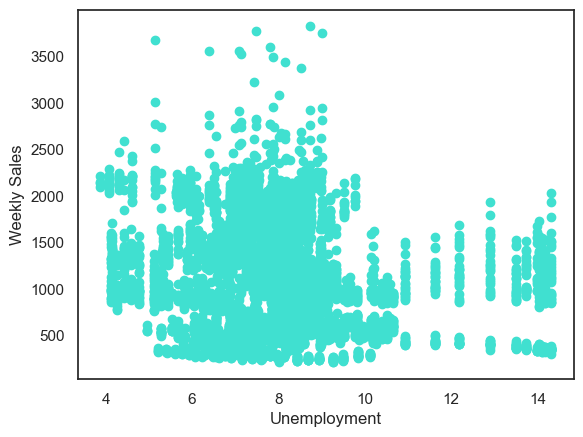

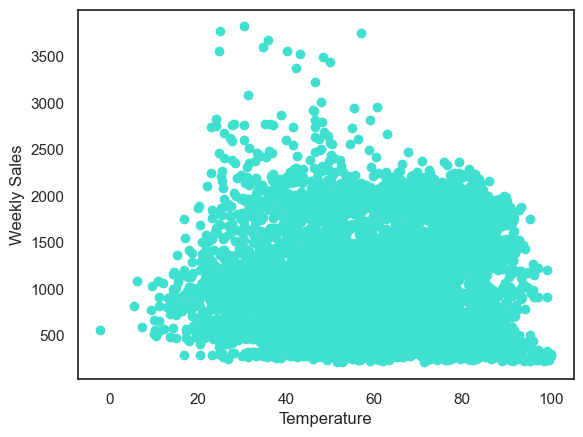

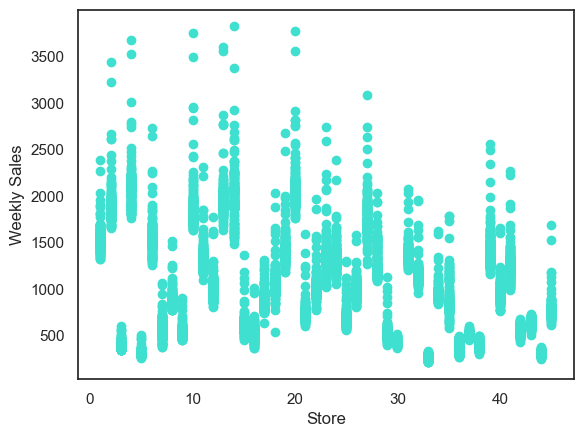

In [488]:
scatter(data, 'Fuel_Price')
scatter(data, 'Size')
scatter(data, 'CPI')
scatter(data, 'Type')
scatter(data, 'IsHoliday')
scatter(data, 'Unemployment')
scatter(data, 'Temperature')
scatter(data, 'Store')

In [489]:
data['Week'] = data.Date.dt.isocalendar().week 

In [490]:
data.head()

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year,Week
0,1,2010-02-05,1643.69090,A,151315,42.31,2.572,-500.0,-500.0,-500.0,-500.0,-500.0,211.096358,8.106,0,5,Feb,2010,5
1,1,2010-02-12,1641.95744,A,151315,38.51,2.548,-500.0,-500.0,-500.0,-500.0,-500.0,211.242170,8.106,1,12,Feb,2010,6
2,1,2010-02-19,1611.96817,A,151315,39.93,2.514,-500.0,-500.0,-500.0,-500.0,-500.0,211.289143,8.106,0,19,Feb,2010,7
3,1,2010-02-26,1409.72759,A,151315,46.63,2.561,-500.0,-500.0,-500.0,-500.0,-500.0,211.319643,8.106,0,26,Feb,2010,8
4,1,2010-03-05,1554.80668,A,151315,46.50,2.625,-500.0,-500.0,-500.0,-500.0,-500.0,211.350143,8.106,0,5,Mar,2010,9


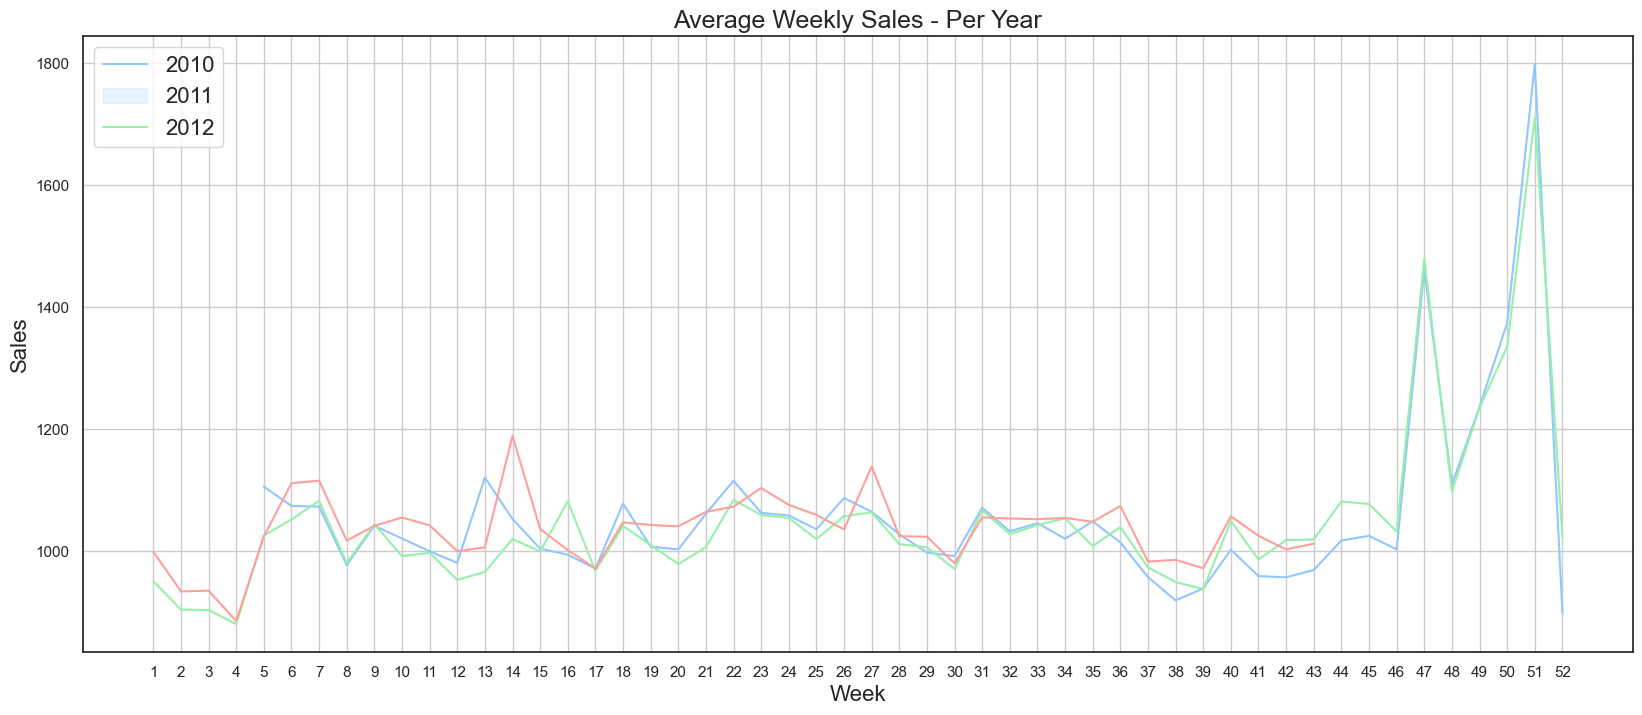

In [491]:
weekly_sales_2010 = data[data.Year==2010]['Weekly_Sales'].groupby(data['Week']).mean()
weekly_sales_2011 = data[data.Year==2011]['Weekly_Sales'].groupby(data['Week']).mean()
weekly_sales_2012 = data[data.Year==2012]['Weekly_Sales'].groupby(data['Week']).mean()
# Combine the data into a single DataFrame for easier plotting
combined_sales = pd.DataFrame({
    '2010': weekly_sales_2010,
    '2011': weekly_sales_2011,
    '2012': weekly_sales_2012
})
plt.figure(figsize=(20,8))
sns.lineplot(x = weekly_sales_2010.index, y = weekly_sales_2010.values)
sns.lineplot(x = weekly_sales_2011.index, y = weekly_sales_2011.values)
sns.lineplot(x = weekly_sales_2012.index, y = weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

Note :
As we can see, there is one important Holiday not included in 'IsHoliday'. It's the Easter Day. It is always in a Sunday, but can fall on different weeks.

In 2010 is in Week 13

In 2011, Week 16

Week 14 in 2012

Week 13 in 2013 for Test set

So, we can change to 'True' these Weeks in each Year.

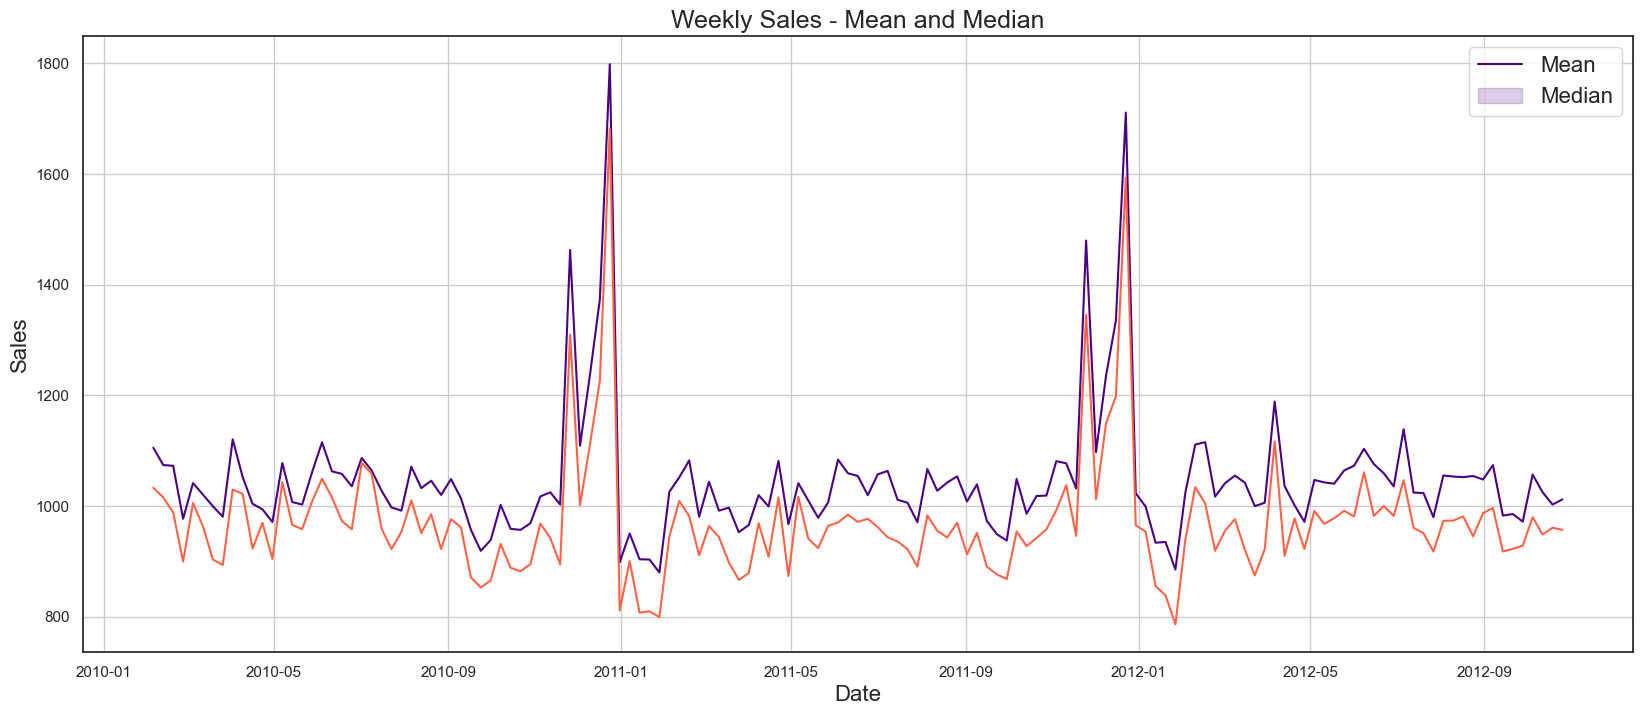

In [492]:
weekly_sales_mean = data['Weekly_Sales'].groupby(data['Date']).mean()
weekly_sales_median = data['Weekly_Sales'].groupby(data['Date']).median()
plt.figure(figsize=(20,8))
sns.lineplot(x = weekly_sales_mean.index, y = weekly_sales_mean.values, color = 'indigo')
sns.lineplot(x = weekly_sales_median.index, y = weekly_sales_median.values, color = 'tomato')
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

Checking the relationship of the other features with weekly sales

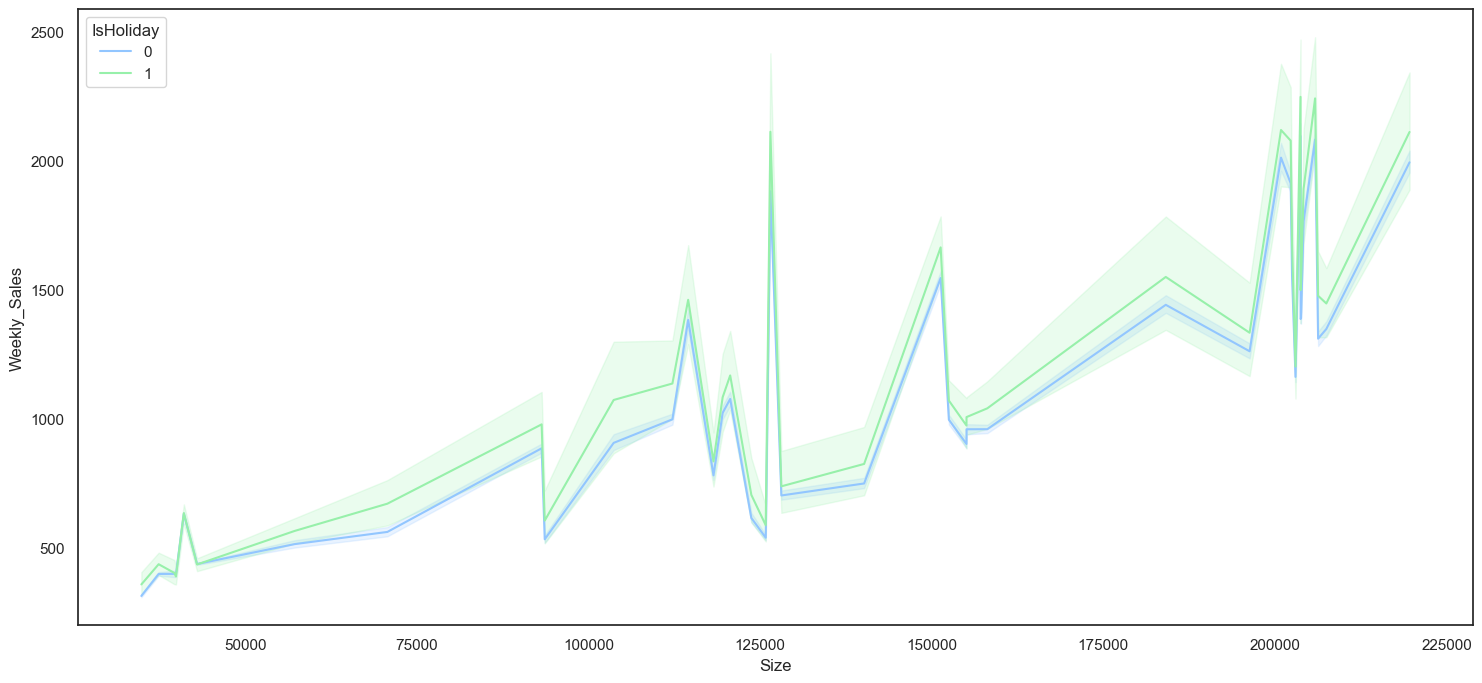

In [493]:
plt.figure(figsize=(18,8))
sns.lineplot ( data = data, x = 'Size', y =  'Weekly_Sales', hue = 'IsHoliday');

In [494]:
px.histogram(data, x='Temperature', y ='Weekly_Sales', color='IsHoliday', marginal='box')

In [495]:
px.histogram(data, x='Fuel_Price', y ='Weekly_Sales', color='IsHoliday', marginal='box')

In [496]:
px.histogram(data, x='CPI', y ='Weekly_Sales', color='IsHoliday')

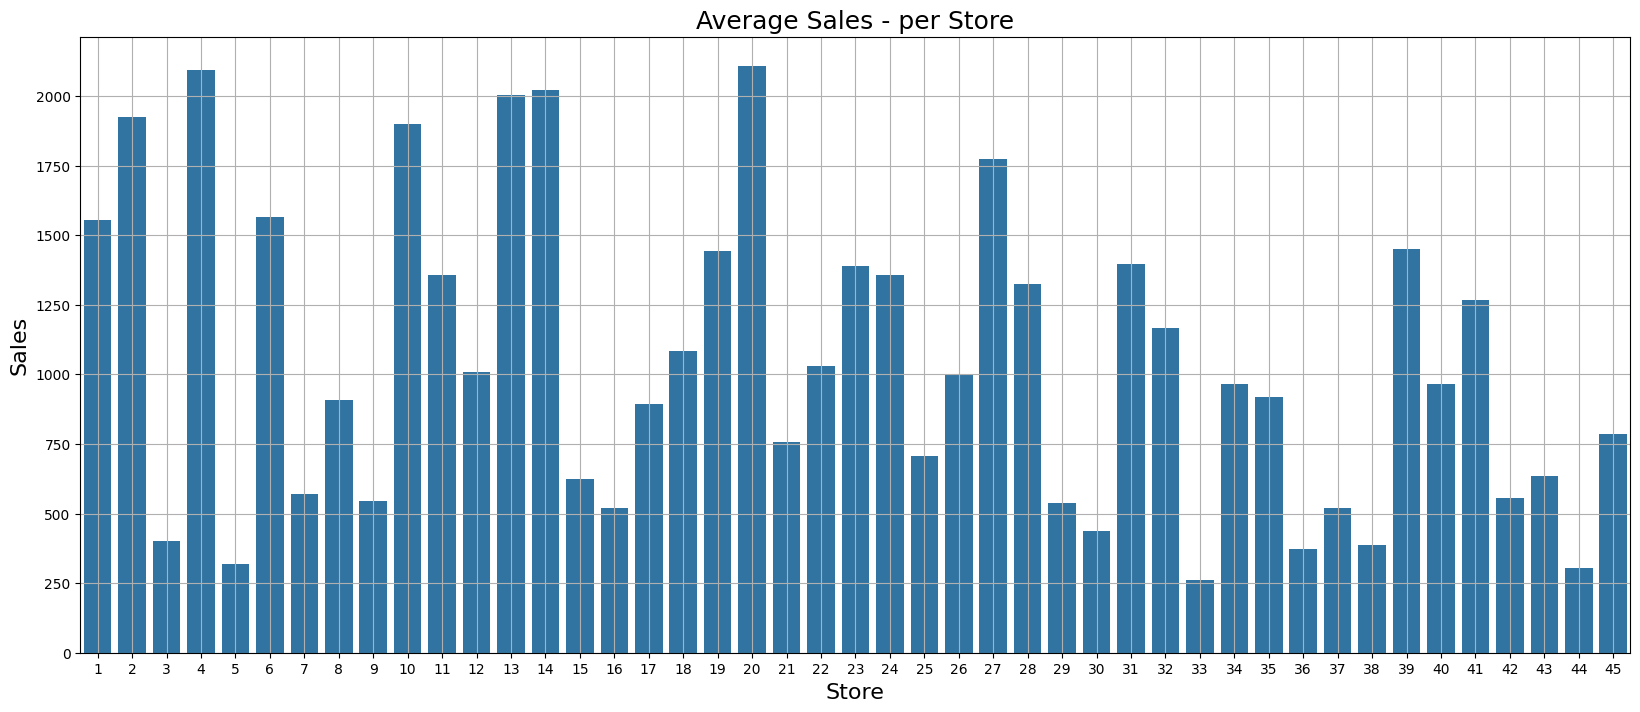

In [497]:
weekly_sales = data['Weekly_Sales'].groupby(data['Store']).mean()
plt.figure(figsize=(20,8))
plt.style.use('default')
sns.barplot(x =  weekly_sales.index, y = weekly_sales.values)
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

In [498]:
columns_to_keep = [col for col in data.columns if col != 'Type' and col !='Month']
data_without_type = data[columns_to_keep]

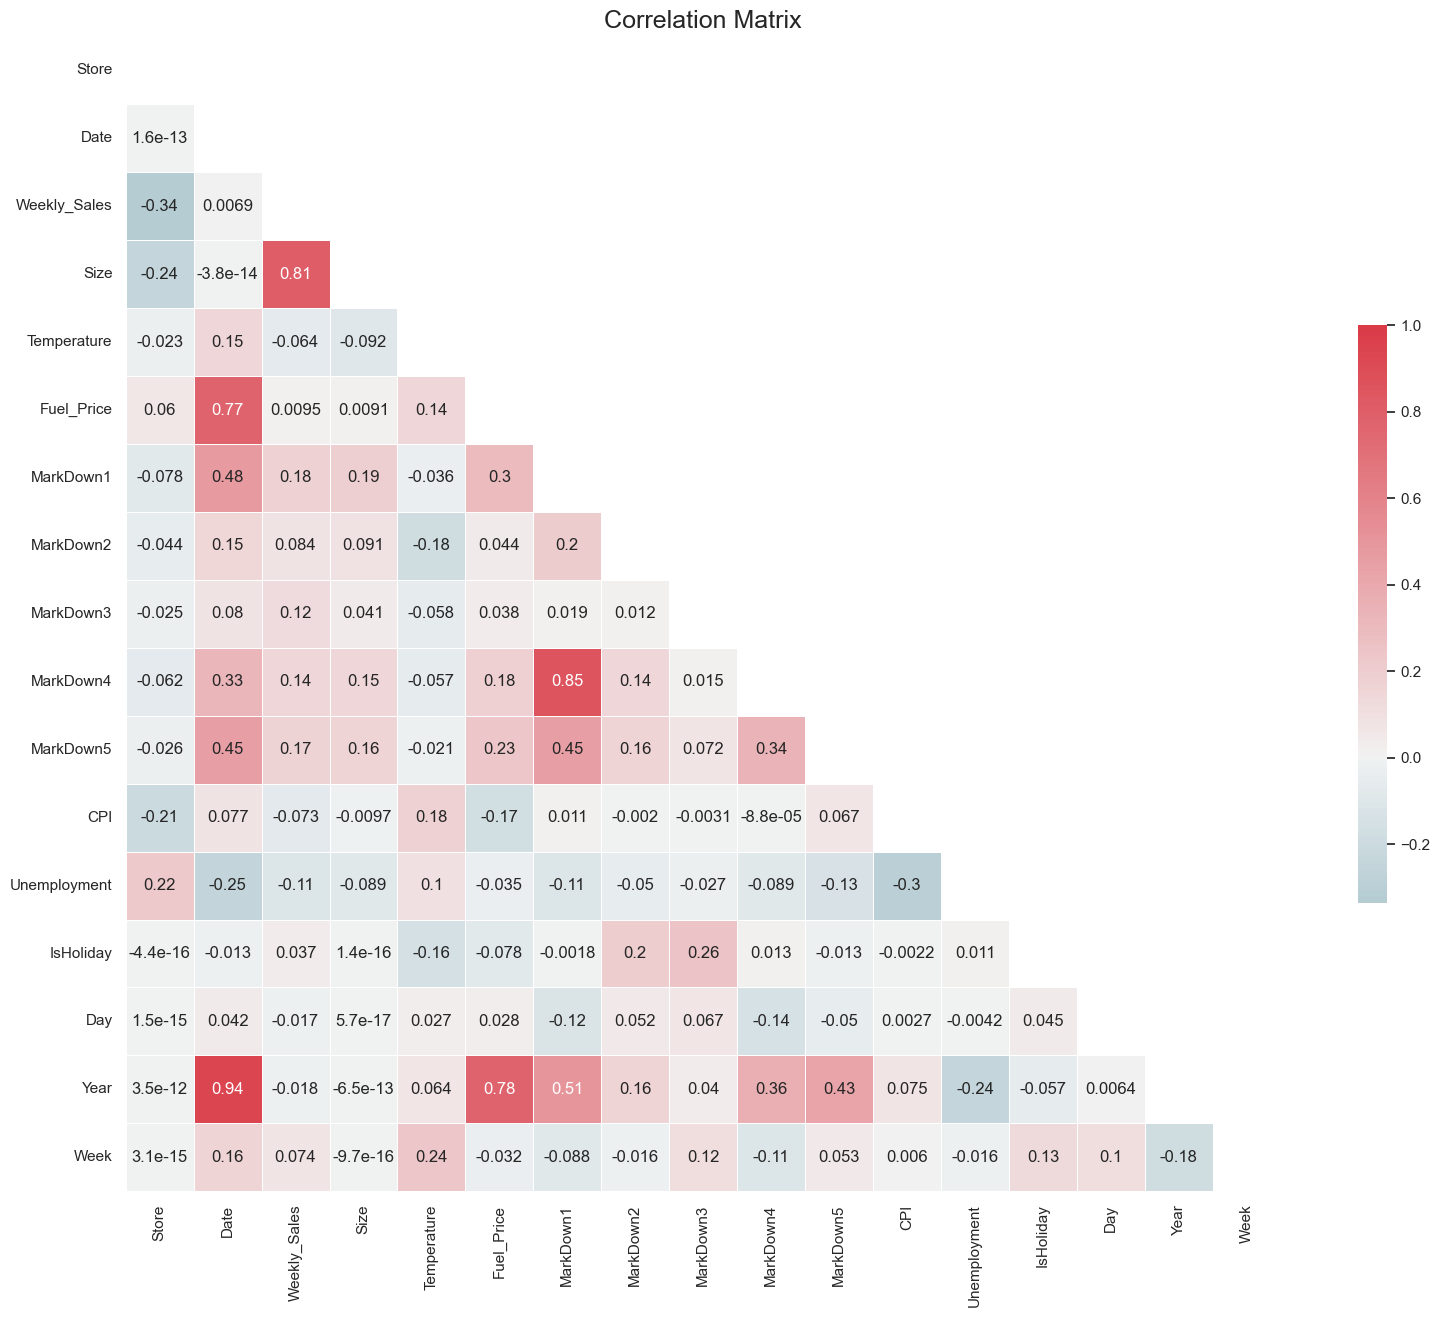

In [499]:
sns.set(style="white")

corr = data_without_type.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

## Detailed Time-Series Analysis

### What is Time Series

Any data recorded with some fixed interval of time is called as time series data. This fixed interval can be hourly, daily, monthly or yearly. e.g. hourly temp reading, daily changing fuel prices, monthly electricity bill, annul company profit report etc. In time series data, time will always be independent variable and there can be one or many dependent variable.

In above example since there is only one variable dependent on time so its called as univariate time series. If there are multiple dependent variables, then its called as multivariate time series.

Objective of time series analysis is to understand how change in time affect the dependent variables and accordingly predict values for future time intervals.

### Stationarity Data

For accurate analysis and forecasting trend and seasonality is removed from the time series and converted it into stationary series. Time series data is said to be stationary when statistical properties like mean, standard deviation are constant and there is no seasonality. In other words statistical properties of the time series data should not be a function of time.



### Test for Stationarity

Easy way is to look at the plot and look for any obvious trend or seasonality. While working on real world data we can also use more sophisticated methods like rolling statistic and Augmented Dickey Fuller test to check stationarity of the data.

Rolling Statistics 
In rolling statistics technique we define a size of window to calculate the mean and standard deviation throughout the series. For stationary series mean and standard deviation shouldn't change with time.

### Augmented Dickey Fuller (ADF) Test

I won't go into the details of how this test works. I will concentrate more on how to interpret the result of this test to determine the stationarity of the series. ADF test will return 'p-value' and 'Test Statistics' output values.

p-value > 0.05: non-stationary.
p-value <= 0.05: stationary.
Test statistics: More negative this value more likely we have stationary series. Also, this value should be smaller than critical values(1%, 5%, 10%). For e.g. If test statistic is smaller than the 5% critical values, then we can say with 95% confidence that this is a stationary series

In [500]:
data1 = pd.read_csv('train.csv.zip')
data1.set_index('Date', inplace=True)

store4 = data1[data1.Store == 4]
# there are about 45 different stores in this dataset.

sales4 = pd.DataFrame(store4.Weekly_Sales.groupby(store4.index).sum())
sales4.dtypes
sales4.head(20)
# Grouped weekly sales by store 4

#remove date from index to change its dtype because it clearly isnt acceptable.
sales4.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales4['Date'] = pd.to_datetime(sales4['Date'])
# resetting date back to the index
sales4.set_index('Date',inplace = True)

In [501]:
# Lets take store 6 data for analysis
store6 = data1[data1.Store == 6]
# there are about 45 different stores in this dataset.

sales6 = pd.DataFrame(store6.Weekly_Sales.groupby(store6.index).sum())
sales6.dtypes
# Grouped weekly sales by store 6

#remove date from index to change its dtype because it clearly isnt acceptable.
sales6.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales6['Date'] = pd.to_datetime(sales6['Date'])
# resetting date back to the index
sales6.set_index('Date',inplace = True)

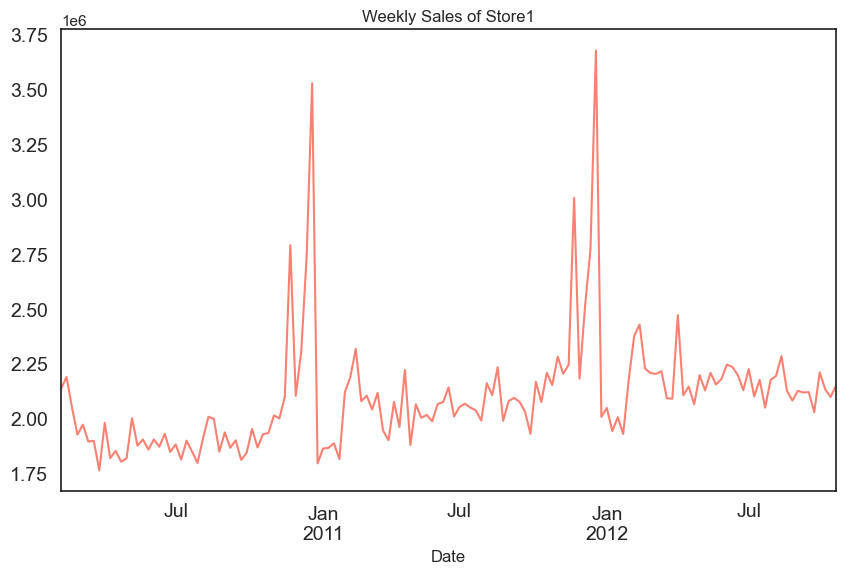

In [502]:
sales4.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of Store1', fontsize=14, color = 'salmon')
plt.show()

## Time Series Components


### Time Series Characteristics

Mean, standard deviation and seasonality defines different characteristics of the time series.

Time_Series_Characteristics

Important characteristics of the time series are as below

Trend 
Trend represent the change in dependent variables with respect to time from start to end. In case of increasing trend dependent variable will increase with time and vice versa. It's not necessary to have definite trend in time series, we can have a single time series with increasing and decreasing trend. In short trend represent the varying mean of time series data.

Trend

Seasonality 
If observations repeats after fixed time interval then they are referred as seasonal observations. These seasonal changes in data can occur because of natural events or man-made events. For example every year warm cloths sales increases just before winter season. So seasonality represent the data variations at fixed intervals.

Seasonality

Irregularities 
This is also called as noise. Strange dips and jump in the data are called as irregularities. These fluctuations are caused by uncontrollable events like earthquakes, wars, flood, pandemic etc. For example because of COVID-19 pandemic there is huge demand for hand sanitizers and masks.

Irregularities

Cyclicity 
Cyclicity occurs when observations in the series repeats in random pattern. Note that if there is any fixed pattern then it becomes seasonality, in case of cyclicity observations may repeat after a week, months or may be after a year. These kinds of patterns are much harder to predict.

Cyclicity

Time series data which has above characteristics is called as 'Non-Stationary Data'. For any analysis on time series data we must convert it to 'Stationary Data'

The general guideline is to estimate the trend and seasonality in the time series, and then make the time series stationary for data modeling. In data modeling step statistical techniques are used for time series analysis and forecasting. Once we have the predictions, in the final step forecasted values converted into the original scale by applying trend and seasonality constraints back.

Time Series Analysis

As name suggest its analysis of the time series data to identify the patterns in it. I will briefly explain the different techniques and test for time series data analysis.
Time Series Decomposition

Time series decomposition helps to deconstruct the time series into several component like trend and seasonality for better visualization of its characteristics. Using time-series decomposition makes it easier to quickly identify a changing mean or variation in the data
Decomposition_of_Time_Series

Additive Decomposition
An additive model suggests that the components are added together.
An additive model is linear where changes over time are consistently made by the same amount.
A linear seasonality has the same frequency (width of the cycles) and amplitude (height of the cycles).
The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called seasonal_decompose(). You need to specify whether the model is additive or multiplicative.

The seasonal_decompose() function returns a result object which contains arrays to access four pieces of data from the decomposition.

In [503]:
#!pip install statsmodels

<Figure size 640x480 with 0 Axes>

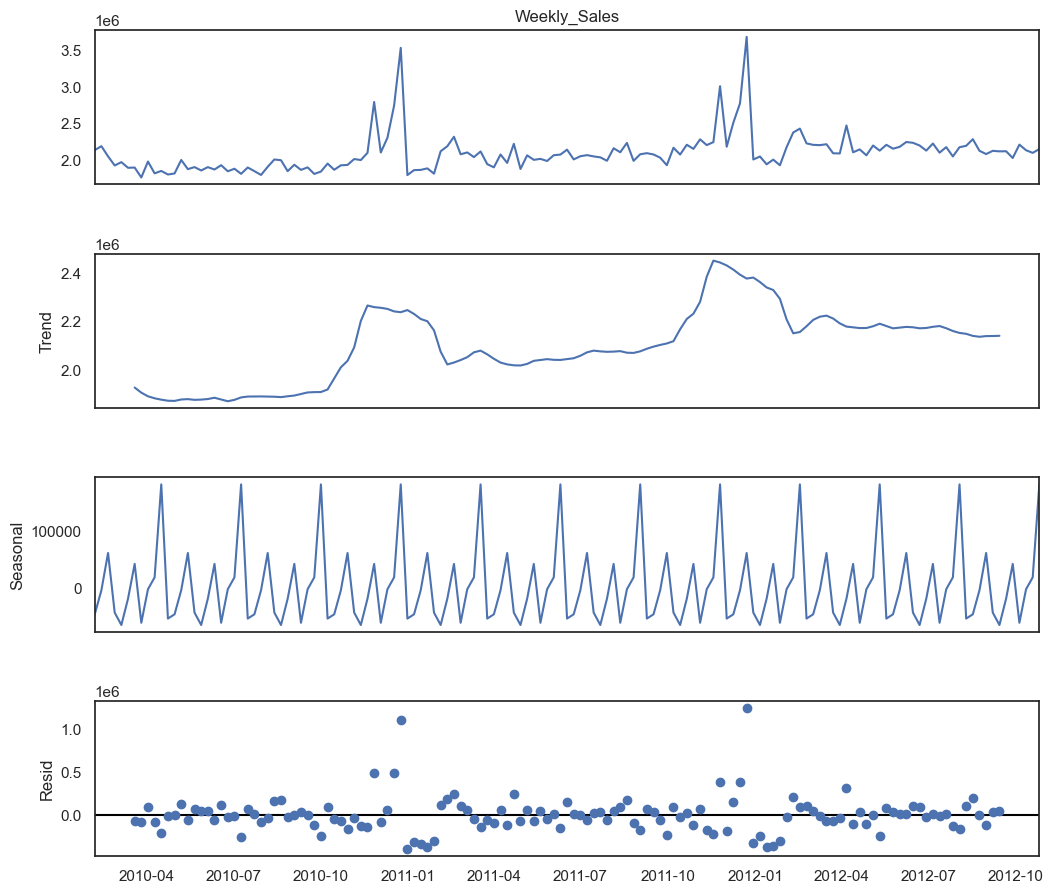

In [504]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales4.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

### Multiplicative Decomposition

An additive model suggests that the components are multipled together.

An additive model is non-linear such as quadratic or exponential.

Changes increase or decrease over time.

A non-linear seasonality has an increasing or decreasing frequency (width of the cycles) and / or amplitude (height of the cycles) over time.

<Figure size 640x480 with 0 Axes>

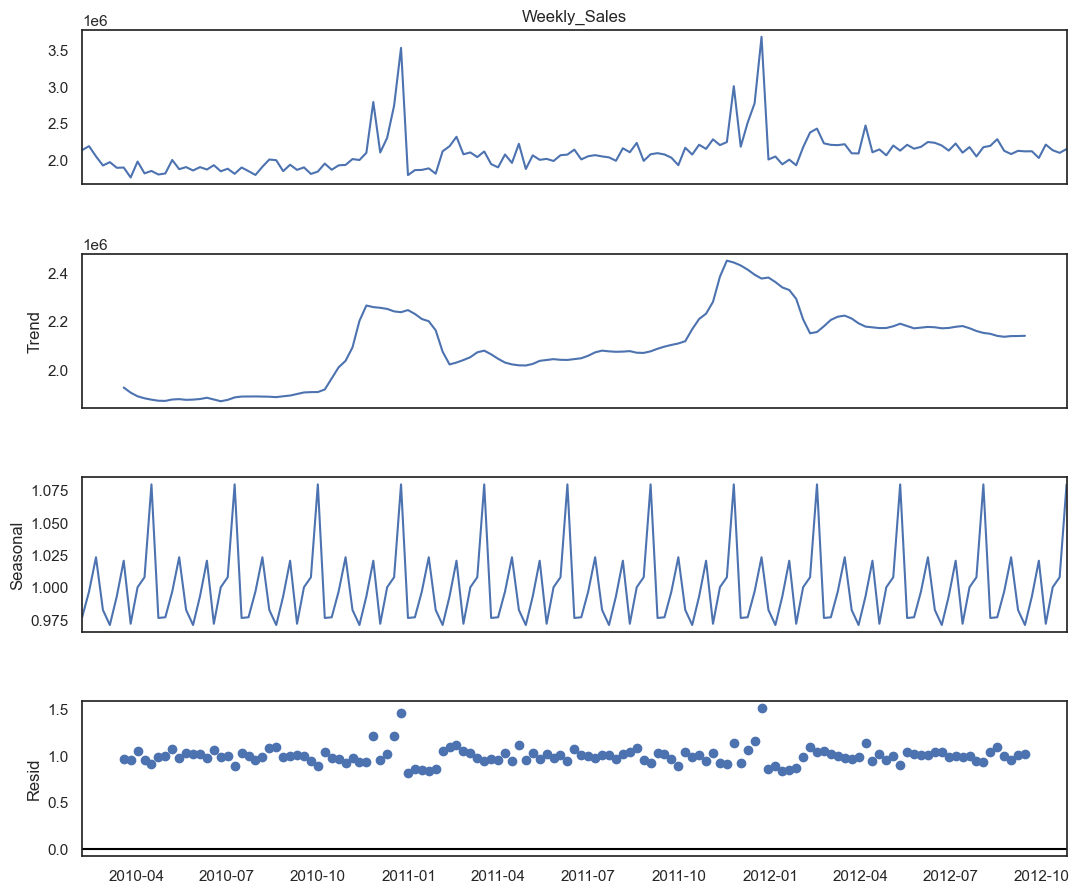

In [505]:
decomposition = seasonal_decompose(sales4.Weekly_Sales, model= 'multiplicative', period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [506]:
y1=sales4.Weekly_Sales
y2=sales6.Weekly_Sales

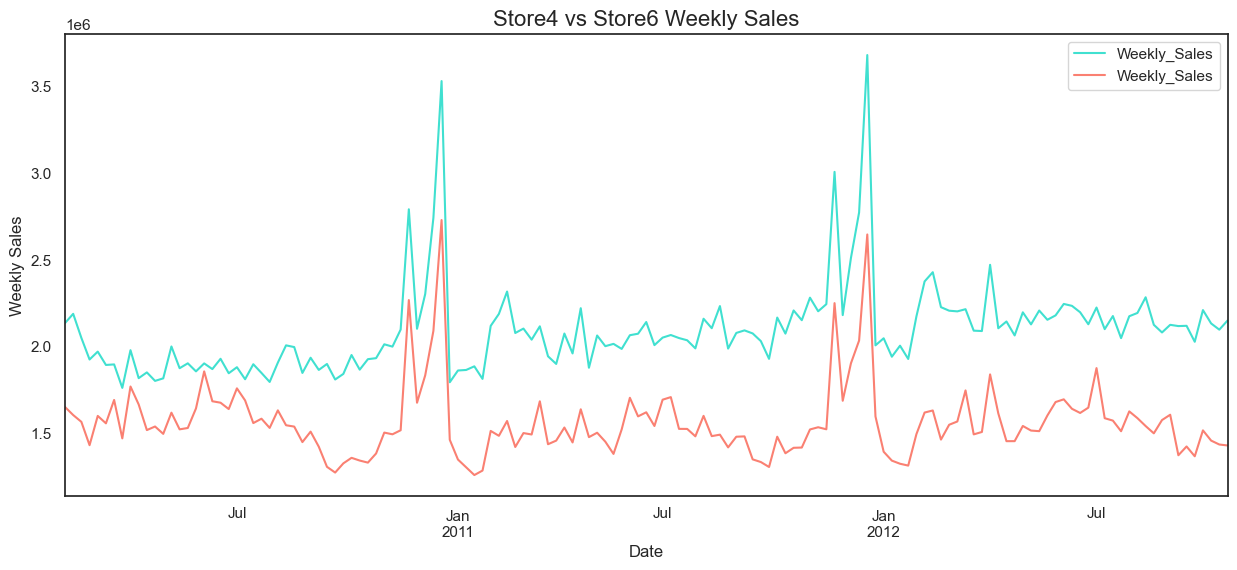

In [507]:
y1.plot(figsize=(15, 6), legend=True, color = 'turquoise')
y2.plot(figsize=(15, 6), legend=True, color = 'salmon')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 Weekly Sales', fontsize = '16')
plt.show()

This shows an interesting trend during year ends (during both 2011 & 2012). The best thing is both the stores have almost the same trends and spike just the magnitude is different.¶
This clearly tells its a timeseries problem and it will be interesting to look more into it

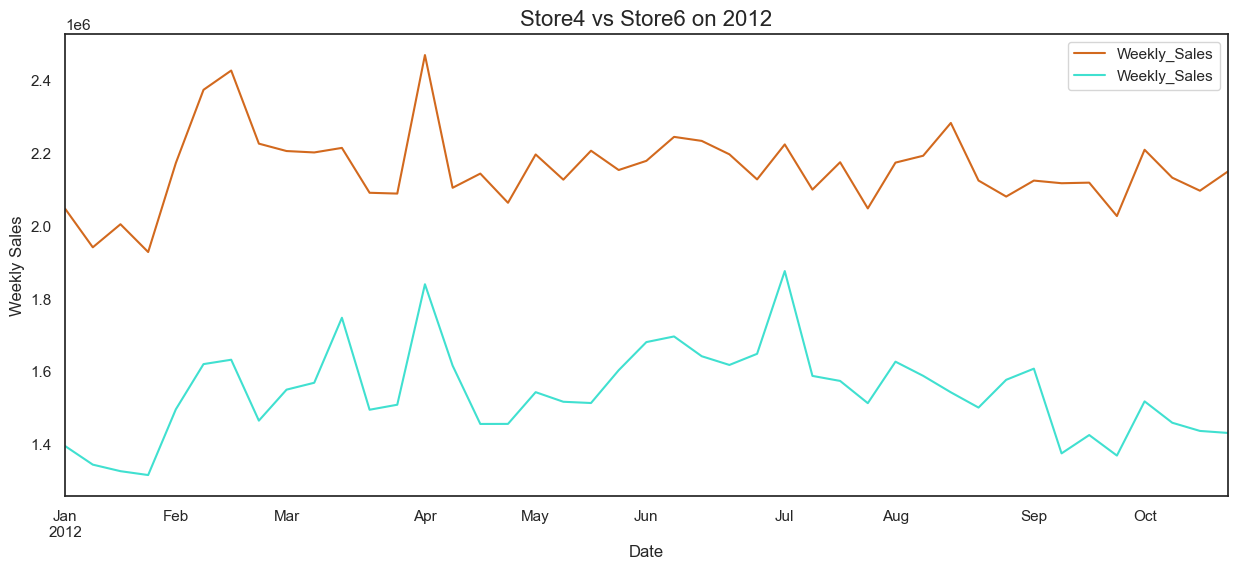

In [508]:
# Lets Look into 2012 data for a better view
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 on 2012', fontsize = '16')
plt.show()

Not quite a trend. Here comes yet another component of timeseries - Irregular component¶
which are other non random sources of variations of series and are mainly the impact of random events such as strikes, earthquakes, and sudden changes in the weather. By their nature, these effects are completely unpredictable.

In [509]:
!pip install itertools

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\kmishra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for itertools


In [510]:
import itertools 
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [511]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\kmishra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\Users\kmishra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\Users\kmishra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7481      0.544     -3.215      0.001      -2.814      -0.682
ar.L2         -1.2852      0.582     -2.207      0.027      -2.427      -0.144
ar.L3         -0.5922      0.251     -2.364      0.018      -1.083      -0.101
ar.L4         -0.1882      0.091     -2.065      0.039      -0.367      -0.010
ma.L1         -1.3772      0.495     -2.782      0.005      -2.347      -0.407
ma.L2         -0.2216      1.063     -0.208      0.835      -2.305       1.862
ma.L3          0.6030      0.592      1.018      0.309      -0.558       1.764
ar.S.L52      -0.0665      0.049     -1.366      0.172      -0.162       0.029
sigma2      1.622e+10   6.82e-11   2.38e+20      0.000    1.62e+10    1.62e+10


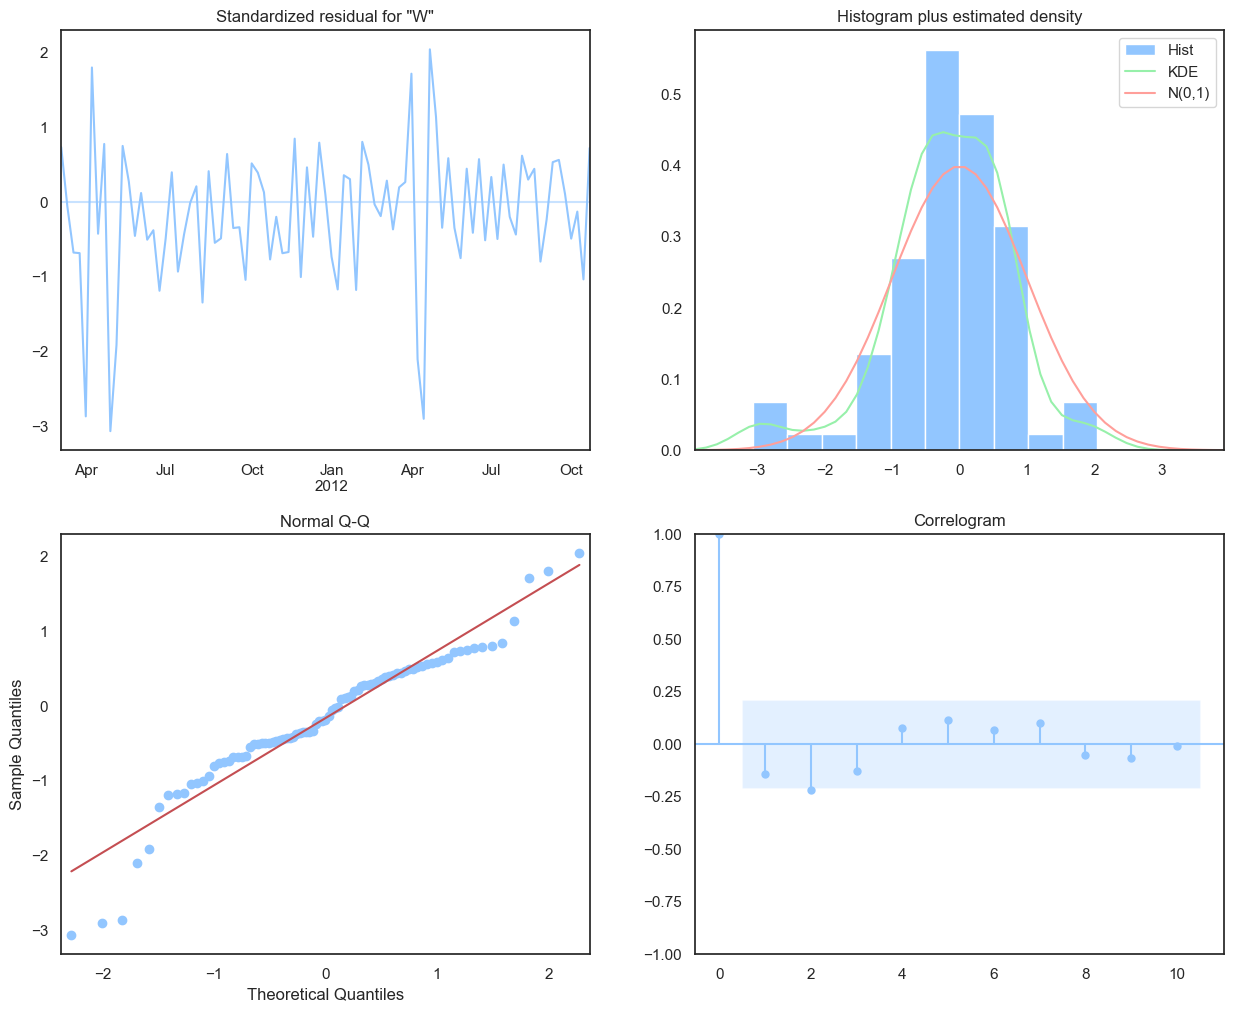

In [512]:
plt.style.use('seaborn-v0_8-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [513]:
# Will predict for last 90 days. So setting the date according to that
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

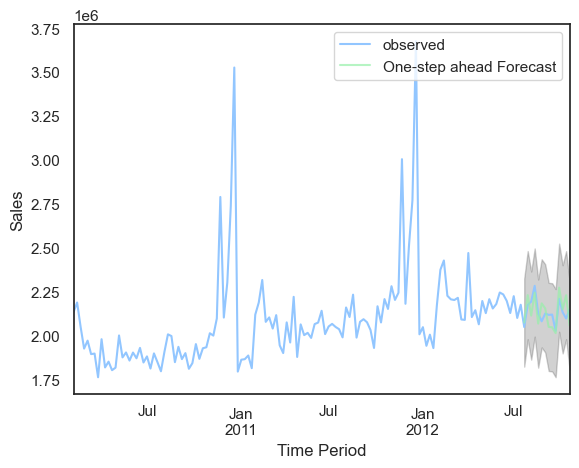

In [514]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [515]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4764830344.62


In [516]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

C:\Users\kmishra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



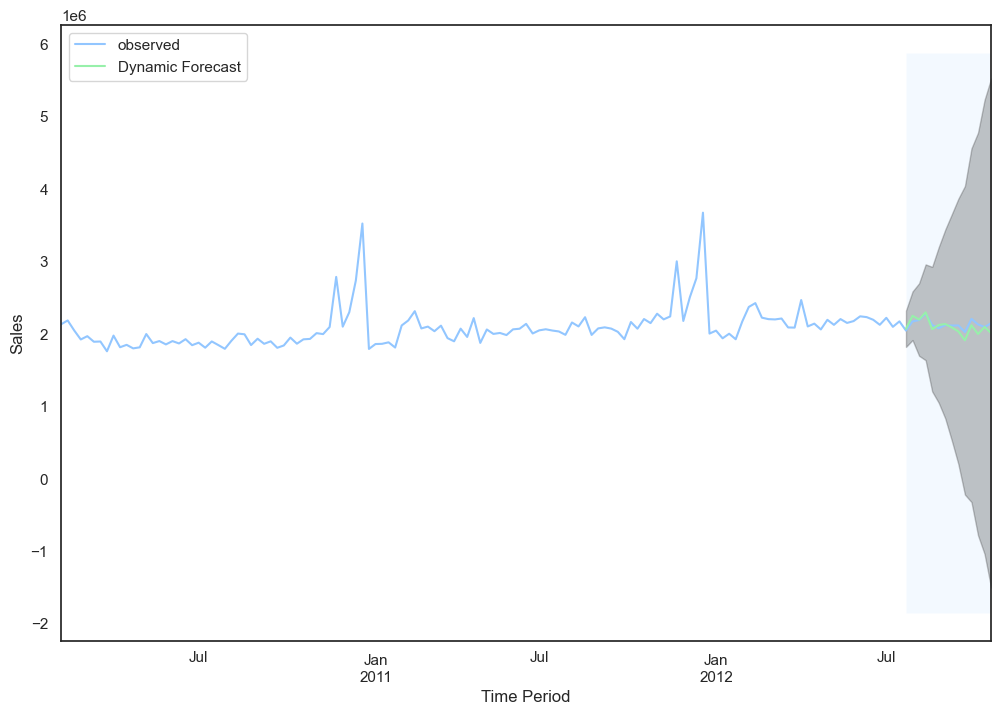

In [517]:
ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [518]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean

y_truth = y1['2012-7-27':]

# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 73814.64


In [519]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 821214.473608315


In [520]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

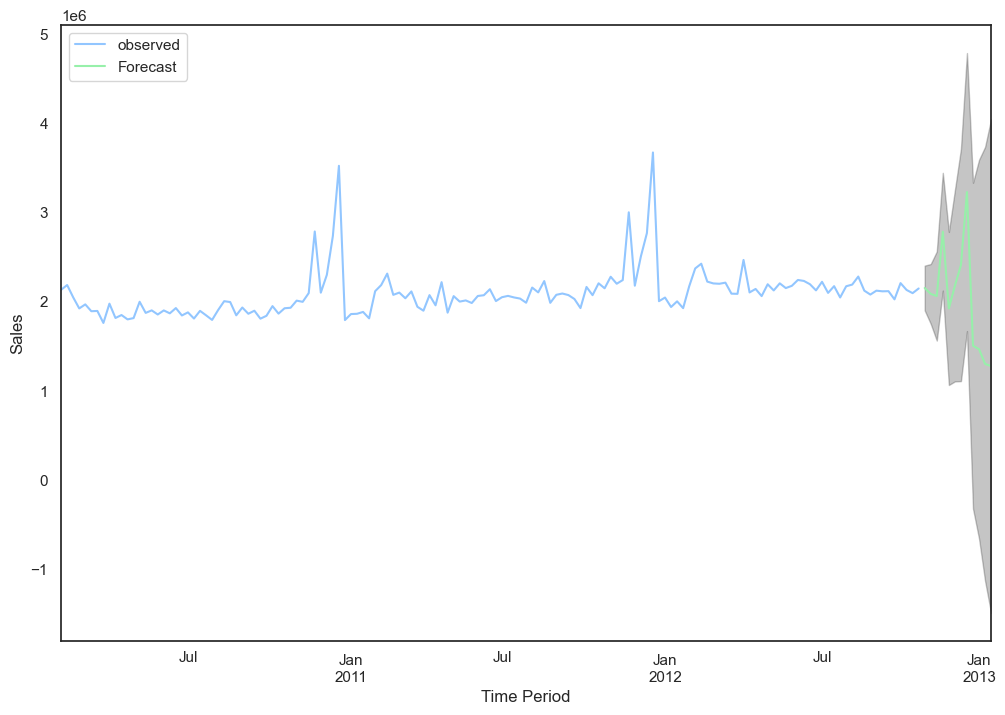

In [521]:
ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

# Modelling And Machine Learning

In [522]:
# create dummy variables for 'Type' and keeping all columns to see heatmap then will drop 1 column
Type_dummies = pd.get_dummies(data.Type, prefix='Type')

# concatenate two DataFrames (axis=0 for rows, axis=1 for columns)
data = pd.concat([data, Type_dummies], axis=1)

# Not dropping the orginal Type column now so that I can use the field in some data analysis

In [523]:
#Create a dataframe for heatmap
data_heatmap_df=data.copy()

# Eliminating all the columns that are not continuous/binary  variables from the heatmap section.
data_heatmap_df.drop(['Store','Day','Month','Year','Date','Store','Type','Type_A','Type_B','Type_C'], axis=1,inplace=True)


# Lets look the correlation matrix and heat map of the 

## Correlation Heat map
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,8))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap='Pastel1_r')

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

#### Statistical analysis and correlations

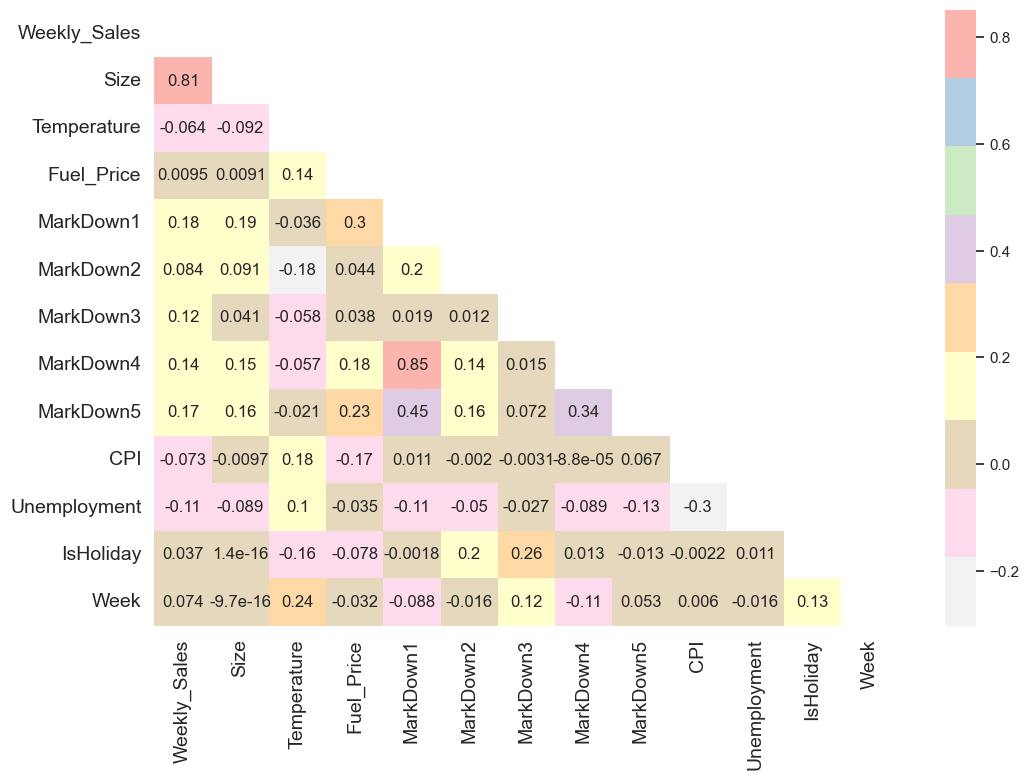

In [524]:
correlation_heat_map(data_heatmap_df)

### Plotting data

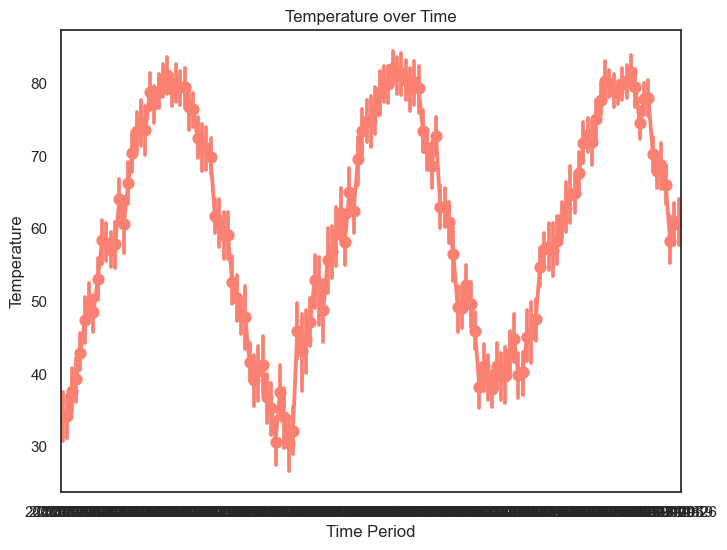

In [525]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Temperature", data=data, color = 'salmon')
plt.xlabel('Time Period')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.show()
# inference: Graph clearly shows Temperature is more of a seasonal and repeated in cycles and this would 
# be an interesting data point that we can use for studies further

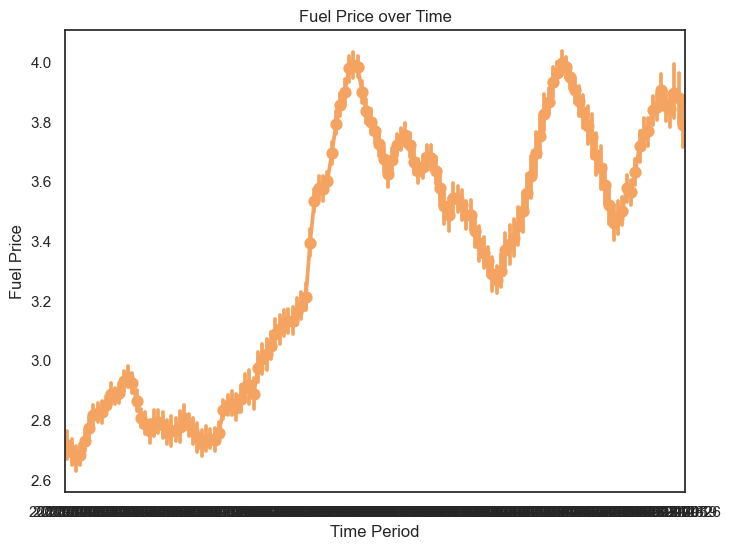

In [526]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Fuel_Price", data=data, color = 'sandybrown')
plt.xlabel('Time Period')
plt.ylabel('Fuel Price')
plt.title('Fuel Price over Time')
plt.show()
# inference: Fuel price varies over time and there are high and lows

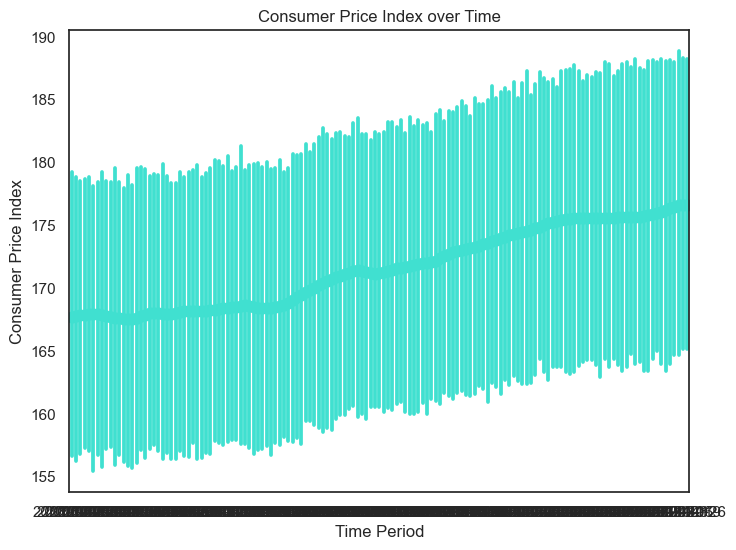

In [527]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="CPI", data=data, color = 'turquoise')
plt.xlabel('Time Period')
plt.ylabel('Consumer Price Index')
plt.title('Consumer Price Index over Time')
plt.show()
# inference: over time CPI have increased. but the change is not much

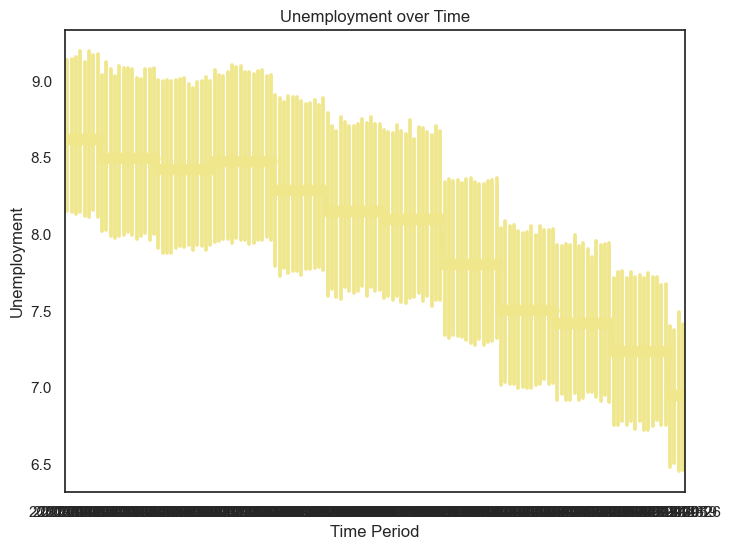

In [528]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Unemployment", data=data, color='khaki')
plt.xlabel('Time Period')
plt.ylabel('Unemployment')
plt.title('Unemployment over Time')
plt.show()
# inference:  Over time unemployment have came down we can see this factor also whether it have affected the Sales

This is interesting. Features over time changes quite a bit. We will see whether these have any effects on Sales while we model

We know that Markdown columns have quiet few outliers it can be because of our imputation as well. So we will treate them later and try implement a better way of imputation. Eg: KNN imputation, Random value between min and max imputation..

Weekly Sales also seem to have some Outliers but we will keep them as it is for now as they may indicate crucial information.

#### Visual analysis

C:\Users\kmishra\AppData\Local\Temp\ipykernel_17056\3709503294.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




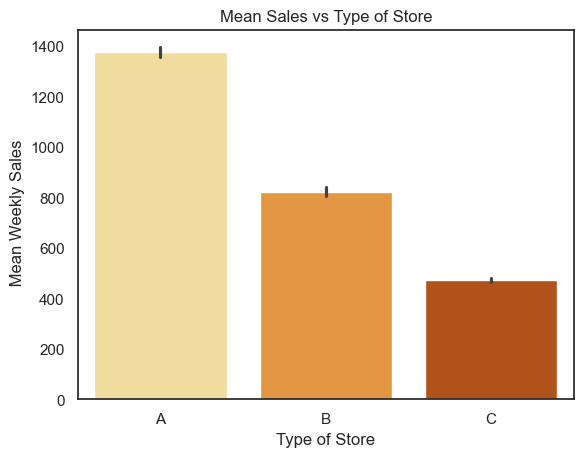

In [529]:
# Checking how the Type of the store have effect on the sales.
col=['coral', 'greenyellow', 'turquoise']
sns.barplot(x="Type", y="Weekly_Sales", data=data,orient='v', palette ='YlOrBr')
plt.xlabel('Type of Store')
plt.ylabel(' Mean Weekly Sales')
plt.title('Mean Sales vs Type of Store')
#plt.savefig('./images/Type_vs_Sales.png')
plt.show()

# inference: From the graph its clear that Type A > Type B > Type C in mean weekly sales. 

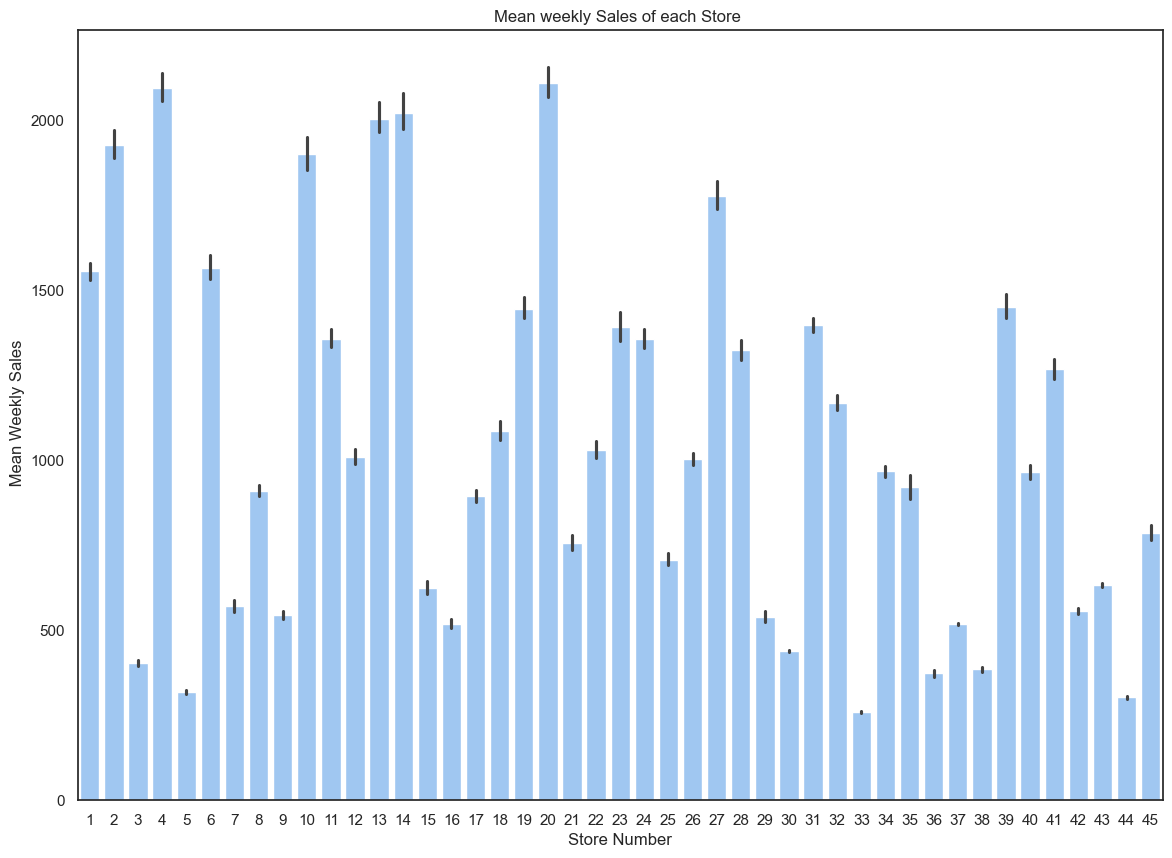

In [530]:
plt.subplots(figsize=(14,10))
sns.barplot(x="Store", y="Weekly_Sales", data=data,orient='v')
plt.xlabel('Store Number')
plt.ylabel(' Mean Weekly Sales')
plt.title('Mean weekly Sales of each Store ')
#plt.savefig('./images/Mean_Weekly_Sales_vs_Stores.png')
plt.show()

# inference : From the chart we can see that there are stores that have a weekly sales from $250,000  
#             to $2,200,000

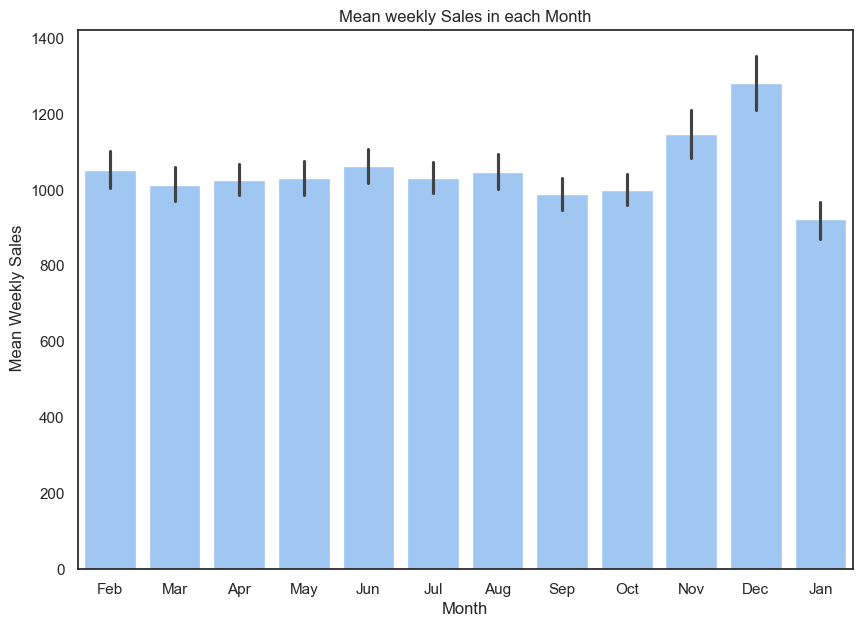

In [531]:
plt.subplots(figsize=(10,7))
sns.barplot(x="Month", y="Weekly_Sales", data=data,orient='v')
plt.xlabel('Month')
plt.ylabel(' Mean Weekly Sales')
plt.title('Mean weekly Sales in each Month')
#plt.savefig('./images/Mean_Weekly_Sales_vs_Months.png')
plt.show()
# inference: Graph shows sales in each month and from this we can see December seems to have a very high sales 
#            compared to every other month and January have the least sales. 

With this we come to an end of EDA & Time series analysis. We will now move forward with Machine Learning & Modelling

## Feature Engineering

Before creating and running model we will look through the columns and make meaningful columns and create dummies where needed.
We need to take special care (KNN Imputation) of Markdown5 which has many outlier and as we know Markdown1-5 which have a lot of missing values.

We will create dummies for "Store, Month, Year"

In [532]:
data.head()

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday,Day,Month,Year,Week,Type_A,Type_B,Type_C
0,1,2010-02-05,1643.69090,A,151315,42.31,2.572,-500.0,-500.0,-500.0,...,211.096358,8.106,0,5,Feb,2010,5,True,False,False
1,1,2010-02-12,1641.95744,A,151315,38.51,2.548,-500.0,-500.0,-500.0,...,211.242170,8.106,1,12,Feb,2010,6,True,False,False
2,1,2010-02-19,1611.96817,A,151315,39.93,2.514,-500.0,-500.0,-500.0,...,211.289143,8.106,0,19,Feb,2010,7,True,False,False
3,1,2010-02-26,1409.72759,A,151315,46.63,2.561,-500.0,-500.0,-500.0,...,211.319643,8.106,0,26,Feb,2010,8,True,False,False
4,1,2010-03-05,1554.80668,A,151315,46.50,2.625,-500.0,-500.0,-500.0,...,211.350143,8.106,0,5,Mar,2010,9,True,False,False


In [533]:
# Create Week column which says which week of the month it is. 
data["Week"]= round(np.floor(((data.Day-1)/7)+1))

# Create dummies for the columns that are required for later studies
Store_dummies = pd.get_dummies(data.Store, prefix='Store')
Month_dummies = pd.get_dummies(data.Month, prefix='Month')
Year_dummies = pd.get_dummies(data.Year, prefix='Year')
Week_dummies = pd.get_dummies(data.Week, prefix='Week')

# concatenate DataFrames (axis=0 for rows, axis=1 for columns)
data = pd.concat([data, Store_dummies,Month_dummies,Year_dummies,Week_dummies], axis=1)

In [534]:
data_decision=data.iloc[:,:18]

data_decision["Week"]= round(np.floor(((data_decision.Day-1)/7)+1))

In [535]:
# Drop the columns that we have created dummies
data.drop(['Type', 'Store','Month','Year','Day','Week'], axis=1, inplace=True) 

In [536]:
# drop each column from the list of dummies to make it perfect to use in models
data.drop(['Type_C', 'Store_1','Month_Jan','Year_2010','Week_5.0'], axis=1, inplace=True) 

Next, we will perform KNN (K Nearest Neighbours) imputation for Markdown columns.

This might not be a big success but according to current situation that might be the best way so that I can use those variables for modeling and try how this comes out. Other ways are imputing with 0, median value, random value but those will put same value in all missing data and that can be very miss leading or bad way to do it.

Lets see whether there would be any effect in sales according to the MarkDowns after this

## KNN model imputation

Finally, it's time for treating the Markdown columns

In [537]:
data.iloc[:,5:10].describe().T

# Inference: more than 50% is missing values with (-500) so imputing with KNN might not be a good idea. 
# But what are the other methods? imputing with random values in the range of that particular columns?
# Lets try that first.

,count,mean,std,min,25%,50%,75%,max
MarkDown1,6435.0,2106.175500,6008.334618,-500.0,-500.0,-500.0,2302.300,88646.76
MarkDown2,6435.0,446.067837,4946.234382,-500.0,-500.0,-500.0,0.090,104519.54
MarkDown3,6435.0,88.158396,5306.320800,-500.0,-500.0,-500.0,3.705,141630.61
MarkDown4,6435.0,661.551088,3853.055534,-500.0,-500.0,-500.0,314.320,67474.85
MarkDown5,6435.0,1260.128491,4227.342723,-500.0,-500.0,-500.0,1983.265,108519.28


In [538]:
data.MarkDown1=data.MarkDown1.map(lambda x: np.nan if x==-500 else x)
data.MarkDown2=data.MarkDown2.map(lambda x: np.nan if x==-500 else x)
data.MarkDown3=data.MarkDown3.map(lambda x: np.nan if x==-500 else x)
data.MarkDown4=data.MarkDown4.map(lambda x: np.nan if x==-500 else x)
data.MarkDown5=data.MarkDown5.map(lambda x: np.nan if x==-500 else x)

In [539]:
missing_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']

# Not including our actual y(Weekly Sales) and Size of store for Markdown since by including weekly sales
# It can be a bad method to use those MarkDown again for predicting weekly sales. 

impute_cols = [c for c in data.columns if not c in ['Weekly_Sales','Date','Sqrt_Sales','lnSales']+missing_cols]

data_imputed=data.copy()

In [540]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict

In [541]:
def find_best_k_reg(X, y, k_min=1, k_max=51, step=2, cv=10):
    k_range = range(k_min, k_max+1, step)
    r2s = []
    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=cv)
        r2s.append(np.mean(scores))
    print ("Best R2 value:",np.max(r2s),"\nBest k: ",np.argmax(k_range))
    return np.argmax(k_range)

In [542]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
impute_missing = data.loc[data.MarkDown1.isnull(), :]
impute_valid = data.loc[~data.MarkDown1.isnull(), :]

y = impute_valid.MarkDown1.values
X = impute_valid[impute_cols]

Xs = ss.fit_transform(X)

Best R2 value: 0.14140639091506765 
Best k:  25


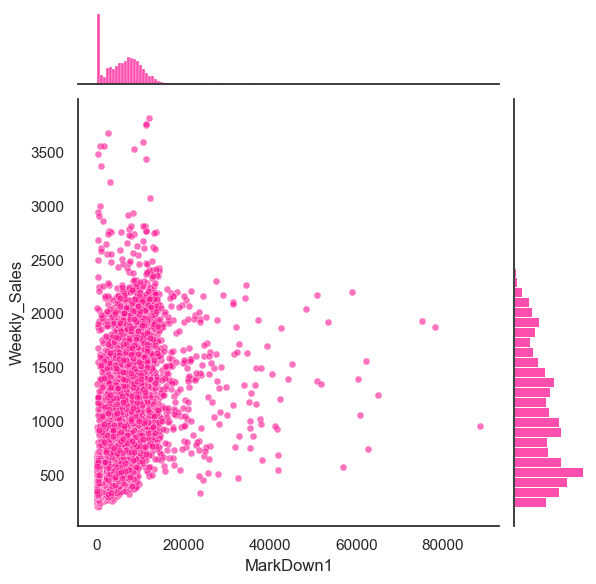

In [545]:
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown1_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown1.isnull(), 'MarkDown1'] = MarkDown1_impute

#Lets look how the MarkDown1 vs Weekly_Sales appear
sns.jointplot(x = data_imputed.MarkDown1, y = data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color='deeppink')
plt.show()

Best R2 value: 0.41503402148479146 
Best k:  25


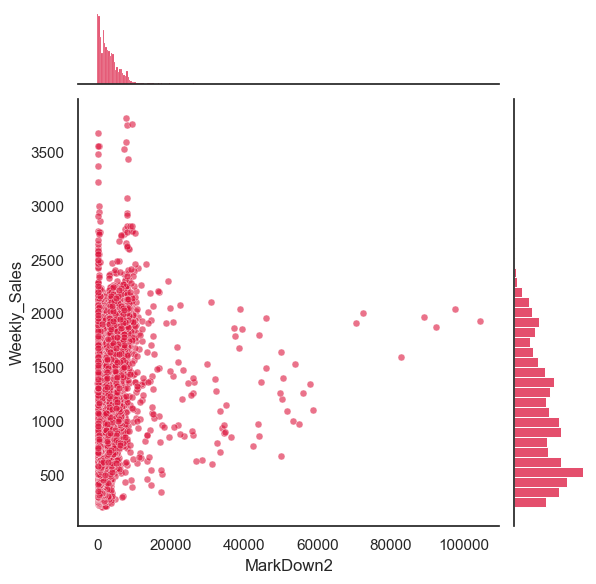

In [546]:
impute_missing = data.loc[data.MarkDown2.isnull(), :]
impute_valid = data.loc[~data.MarkDown2.isnull(), :]

y = impute_valid.MarkDown2.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown2_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown2.isnull(), 'MarkDown2'] = MarkDown2_impute

#Lets look how the MarkDown1 vs Weekly_Sales appear
sns.jointplot(x = data_imputed.MarkDown2, y = data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color = 'crimson')
plt.show()

Best R2 value: 0.20431863554303203 
Best k:  25


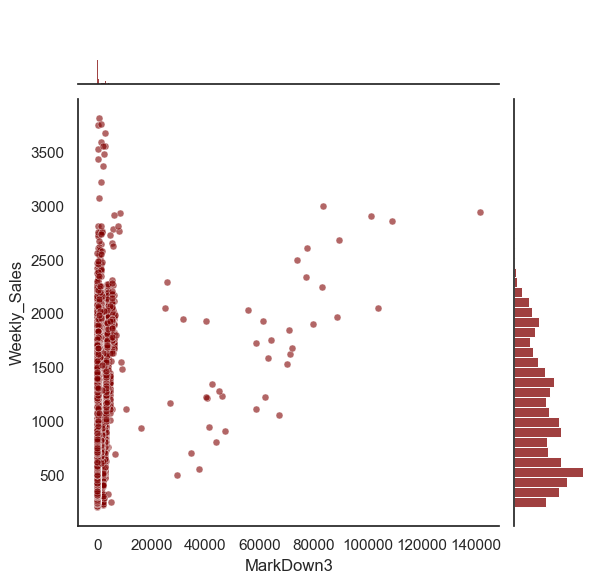

In [547]:
impute_missing = data.loc[data.MarkDown3.isnull(), :]
impute_valid = data.loc[~data.MarkDown3.isnull(), :]

y = impute_valid.MarkDown3.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown3_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown3.isnull(), 'MarkDown3'] = MarkDown3_impute

sns.jointplot(x = data_imputed.MarkDown3, y = data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color= 'maroon')
plt.show()

Best R2 value: 0.3470822603116795 
Best k:  25


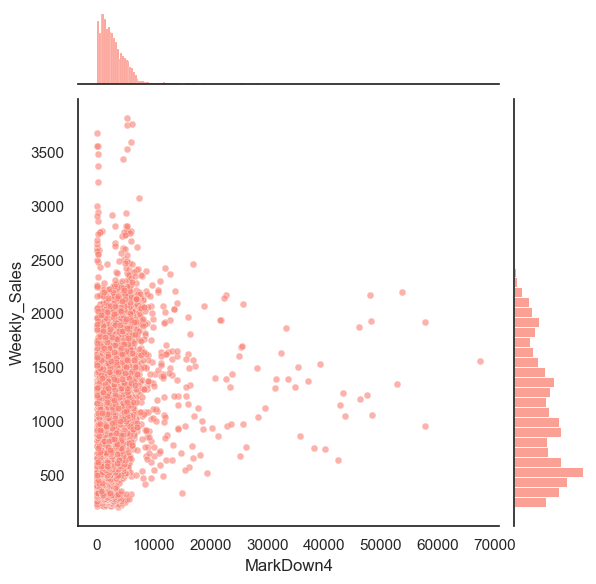

In [549]:
impute_missing = data.loc[data.MarkDown4.isnull(), :]
impute_valid = data.loc[~data.MarkDown4.isnull(), :]

y = impute_valid.MarkDown4.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown4_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown4.isnull(), 'MarkDown4'] = MarkDown4_impute

sns.jointplot(x = data_imputed.MarkDown4, y = data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color = 'salmon')
plt.show()

Best R2 value: 0.0815206539204145 
Best k:  25


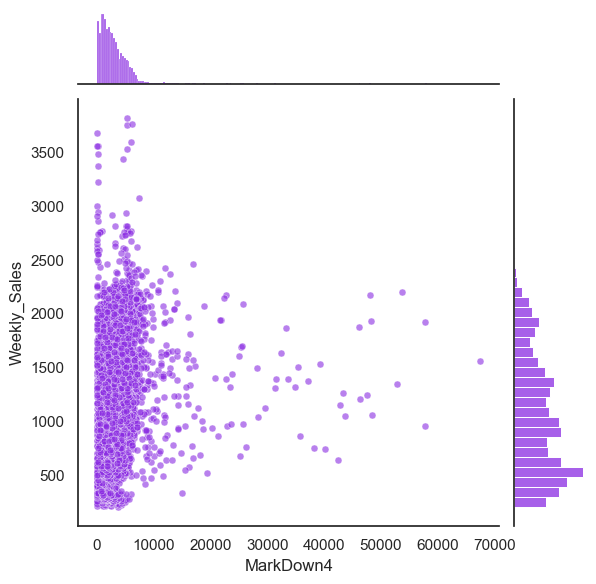

In [550]:
impute_missing = data.loc[data.MarkDown5.isnull(), :]
impute_valid = data.loc[~data.MarkDown5.isnull(), :]

y = impute_valid.MarkDown5.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown5_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown5.isnull(), 'MarkDown5'] = MarkDown5_impute

sns.jointplot(x = data_imputed.MarkDown4, y = data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color = 'blueviolet')
plt.show()

In [551]:
walmart_data=data_imputed.copy()
# The accuracy and R2 are very bad. This means that we likely imputing crap with these models.
# This doesn't necessarily mean that imputation is a bad idea, but we may want to consider
# using a different method.

So finally we have replaced all missing values in MarkDown1-5 with KNN imputation from the given value range itself. We will see the performance of the model and see through whether we have any better methods. As of now my assumption is KNN imputation values would work because thats the best way we have.

Lets Try Linear Regression for predicting Weekly_Sales with and without the imputed values and see whether its better to keep the imputed MarkDown Values

## Modelling

0.945135424566153
0.9437962766125829
Adjusted R^2 0.9444970631538724
Cross-validated scores: [0.94904984 0.94503581 0.93729703 0.90843759 0.93712488 0.94817923
 0.9452239  0.95634433 0.95896954 0.93571193]
Mean Cross validation 0.9421374069189714


Text(0.5, 1.0, 'Predicted vs Actual Sales')

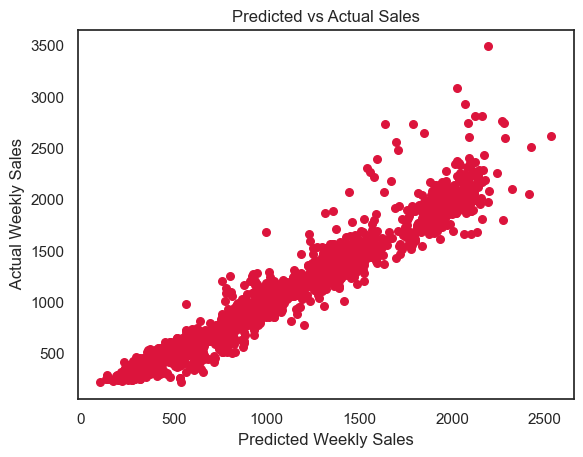

In [553]:
from sklearn.model_selection import train_test_split, cross_val_score   
from sklearn.linear_model import Lasso, LinearRegression, LassoCV
predictors=[col for col in data_imputed.columns if col not in ['Date','Weekly_Sales']]
X=data_imputed[predictors]
y=data_imputed.Weekly_Sales.values 

Xs = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
r2=mlr.score(X_test, y_test)
print(mlr.score(X_test, y_test))
print(mlr.score(X_train, y_train))
adj_r2 = 1 - (len(y)-1)/(len(y)-X.shape[1]-1)*(1-r2)
print("Adjusted R^2",adj_r2)


# Perform 10-fold cross validation
scores = cross_val_score(mlr, X_train, y_train, cv=10)
print ("Cross-validated scores:", scores)
print ("Mean Cross validation",scores.mean())



# Make cross validated predictions on the test sets
predictions = cross_val_predict(mlr, X_test, y_test, cv=10)

plt.scatter(predictions, y_test, s=30, c='crimson', zorder=10)
plt.xlabel('Predicted Weekly Sales')
plt.ylabel(' Actual Weekly Sales')
plt.title('Predicted vs Actual Sales')

##### Now let us look the same model without MarkDowns to check whether data with MarkDown or without MarkDown is good.

0.9339411442155228
0.9418375694645813
Cross-validated scores: [ 0.70062367 -0.58276551  0.04767755  0.55343257  0.50628558  0.38759911
  0.35673651  0.47662397  0.50059683  0.46118851]
Mean Cross validation 0.34079987912803184


Text(0.5, 1.0, 'Predicted vs Actual Sales')

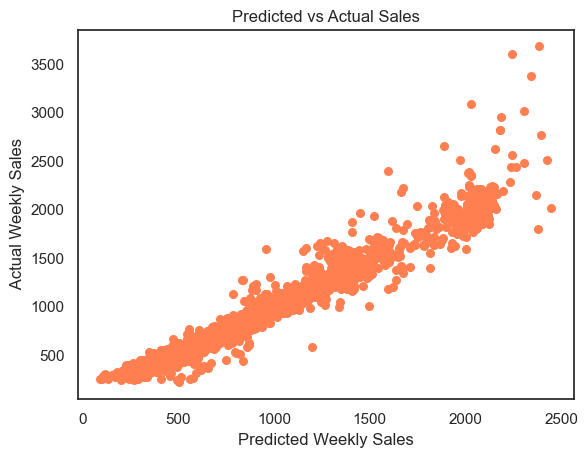

In [554]:
predictors=[col for col in data.columns if col not in ['Date','Weekly_Sales']]
predictors=[col for col in predictors if 'MarkDown' not in col]
X=data[predictors]
y=data.Weekly_Sales.values 
Xs = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))


# Perform 10-fold cross validation
scores = cross_val_score(lr, X, y, cv=10)
print ("Cross-validated scores:", scores)
print ("Mean Cross validation",scores.mean())



# Make cross validated predictions on the test sets
predictions = cross_val_predict(lr, X_test, y_test, cv=10)

plt.scatter(predictions, y_test, s=30, color = 'coral', zorder=10)
plt.xlabel('Predicted Weekly Sales')
plt.ylabel(' Actual Weekly Sales')
plt.title('Predicted vs Actual Sales')

From the Cross validation its clear that the one with Markdown values are better than they are dropped.¶
So we will keep MarkDowns as of now and assume the KNN model have imputed the correct values. Now lets move on to real Modeling for the prediction of Weekly_sales

We have seen that normal running of Linear regression is a very bad idea. Even though it gives a high R2 value the cross validated score doesn't make any sense. Now its time to go on with feature selection

In [555]:
data=data_imputed.copy()

We will divide our train and test datasets first and then deal with that seperately

In [557]:
# Setting the offset to finalize the test data.
from datetime import timedelta
offset = timedelta(days=90)
split_date=data.Date.max()-offset

In [558]:
data_train=data[data.Date < split_date]
data_test=data[data.Date > split_date]

Before we start lets shuffle the dataframe a bit because while we use crossvalidation for regressors it won't take a random sample as test and train, instead it takes section by section. Here my Dataframe have data for each store in order. So if we take section by section model might not have enough data to learn about certain stores and which intern will give terrible answers

In [559]:
data_train = data_train.reindex(np.random.permutation(data_imputed.index))## Identify outliers

In [560]:
data_train.columns

Index(['Date', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type_A', 'Type_B', 'Store_2', 'Store_3',
       'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9',
       'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15',
       'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21',
       'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27',
       'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33',
       'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39',
       'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45',
       'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'Year_2011', 'Year_2012', 'Week_1.0', 'Week_2.0',
       'Week_3

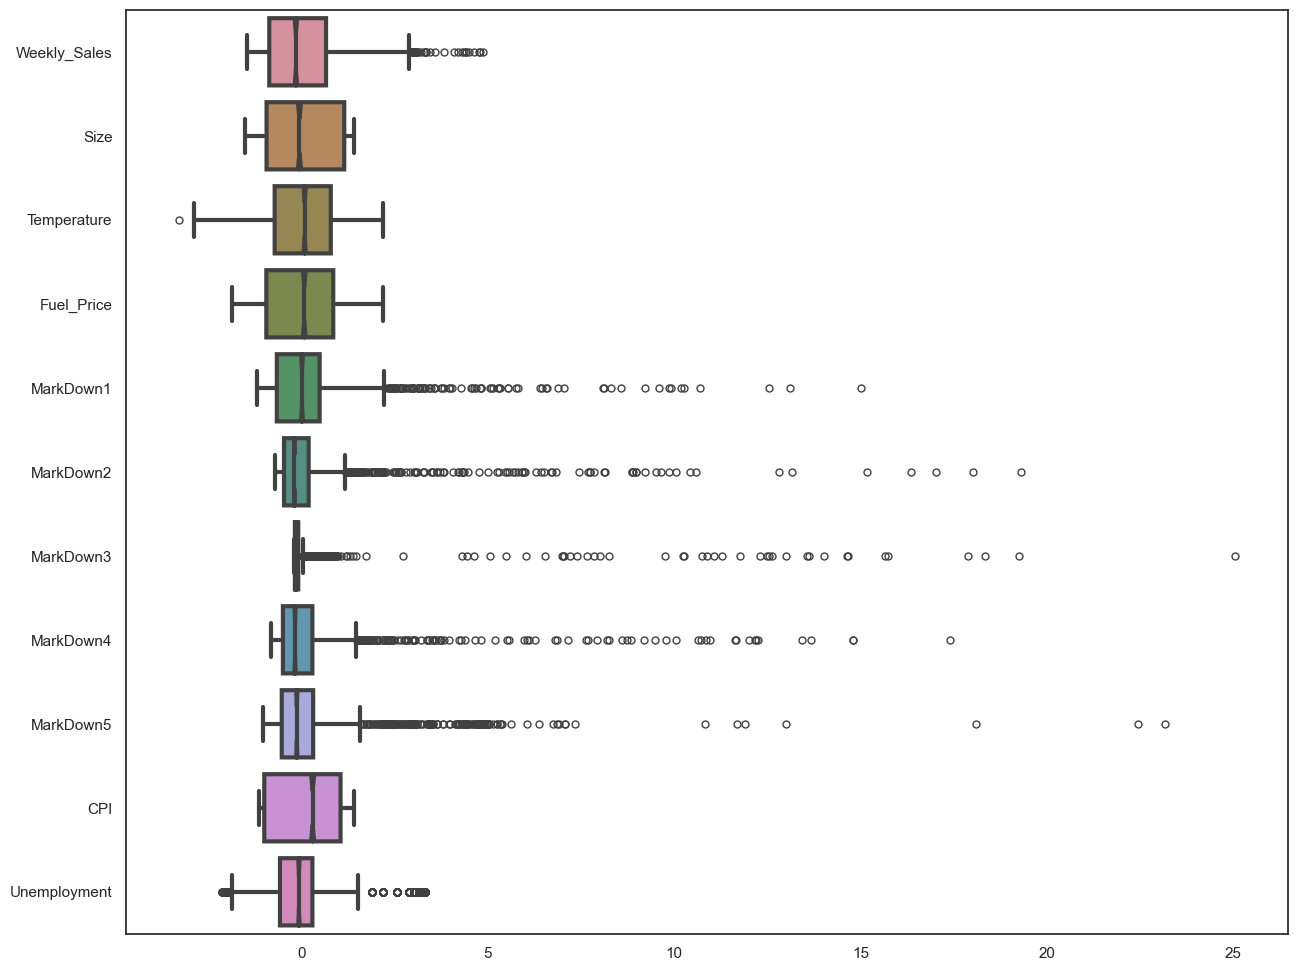

In [561]:
data_box=data_train.iloc[:, 1:12]
data_norm = (data_box - data_box.mean()) / data_box.std()

fig = plt.figure(figsize=(15, 12))
ax = fig.gca()

ax = sns.boxplot(data=data_norm, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

There are quite a lot of outliers in MarkDown, But Lets first deal the outliers in weekly sales data because we might just drop MarkDowns Later because the percentage of missing values are really high in MarkDowns

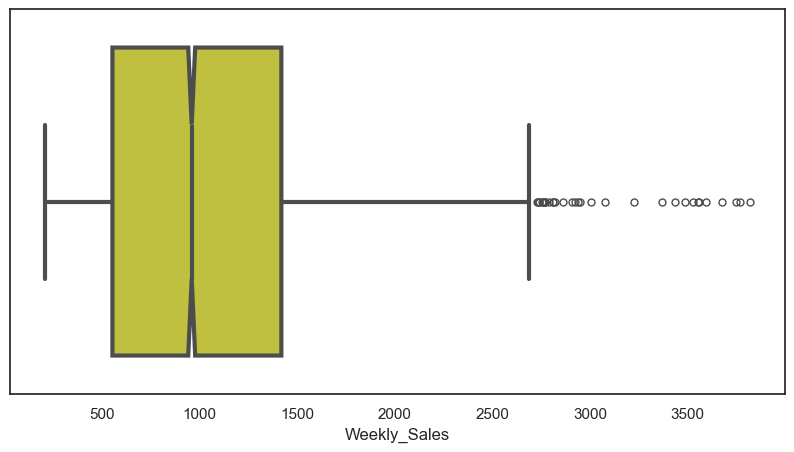

In [562]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()

ax = sns.boxplot(data_train.Weekly_Sales, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax, color = 'yellow')
plt.show()

In [563]:
# Lets consider 3,000,000 as upper limit 
data_train[data_train.Weekly_Sales>3000].shape

(14, 76)

In [564]:
# there is only 14 outliers. Lets drop it and proceed.
data_train=data_train[data_train.Weekly_Sales<3000]

## Improve and Evaluate Model

### Feature Selection

We have seen the models are giving a terrible crossvalidation score. So lets tune our model. for that first we should figure out what all should we use as our features. For this a feature selection would be the best thing. So lets use Lasso Feature Selection and see how our model works with that.

In [565]:
predictors=[col for col in data.columns if col not in ['Weekly_Sales','Sqrt_Sales','lnSales','Date']] # Date

predictors=[col for col in predictors if 'Month' not in col]
predictors=[col for col in predictors if 'Week' not in col]
predictors=[col for col in predictors if 'Year' not in col]

### Test-Train Split such that Test data is last 90 days data (future 3 months prediction)

In [566]:
X_train = data_train[predictors]
y_train = data_train.Weekly_Sales.values

X_test = data_test[predictors]
y_test = data_test.Weekly_Sales.values

In [567]:
X_train_s=ss.fit_transform(X_train)
X_test_s=ss.fit_transform(X_test)

## LGBM Regressor

LightGBM is a relatively new algorithm. It is a gradient boosting framework that uses tree based learning algorithm.

Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise.

It chooses the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm. Light GBM is prefixed as ‘Light’ because of its high speed.

Light GBM can handle the large size of data and takes lower memory to run. Another reason of why Light GBM is popular is because it focuses on accuracy of results. LGBM also supports GPU learning and thus data scientists are widely using LGBM for data science application development.

In [569]:
#!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\kmishra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [570]:
import lightgbm as lgb
lgbm_features = lgb.LGBMRegressor() 

In [572]:
X_train.head()

,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
4910,103681.0,34.42,3.193,14041.9616,4314.4452,3049.9100,5962.2592,5933.1212,136.733257,8.549,...,False,False,False,False,False,False,False,False,False,False
88,151315.0,71.74,3.274,7038.3428,3507.4092,141.4116,2114.0060,5245.4548,217.355273,7.866,...,False,False,False,False,False,False,False,False,False,False
6398,118221.0,36.85,3.695,8683.4300,7421.9900,1.7600,9084.9200,1995.2200,189.842483,8.424,...,False,False,False,False,False,False,False,False,False,True
4848,158114.0,77.30,3.356,3124.0800,92.2200,0.3600,1720.8400,3878.3600,130.719581,9.285,...,False,False,False,False,False,False,False,False,False,False
4128,93638.0,70.61,3.629,4524.8600,492.8000,0.9900,1745.5300,2589.3700,138.162900,9.140,...,False,False,False,False,False,False,False,False,False,False


In [574]:
X_train_subset = X_train.iloc[:, 0:11]

In [575]:
lgbm_features.fit(X_train_subset, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2334
[LightGBM] [Info] Number of data points in the train set: 5836, number of used features: 11
[LightGBM] [Info] Start training from score 1042.925827


LGBMRegressor()

In [577]:
importance_df = pd.DataFrame({
    'feature': X_train_subset.columns,
    'importance': lgbm_features.feature_importances_
}).sort_values('importance', ascending=False)

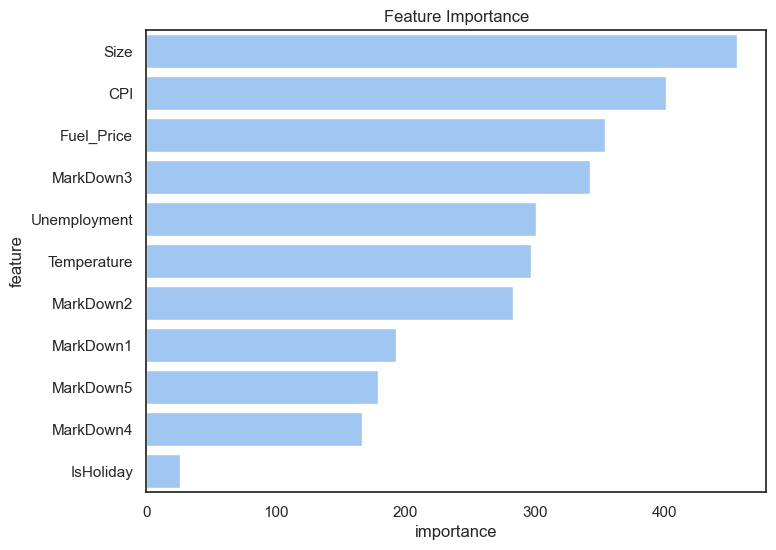

In [578]:
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(15), x='importance', y='feature');

The list of features that are seleted and their magnitude of effect on weekly sales can be seen above (remember the target is scaled down)

We will set the predictors that we got from Lasso as our actual predictors and use in further models

## Lasso Feature Selection

Test- Train Split such that Test data is last 90 days data (Like a furture 3 months prediction)

LASSO is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.
The basic idea is to penalize the model coefficients such that they don’t grow too big and overfit the data. Using LASSO regression, we are essentially eliminating the higher-order terms in the more complex models.

So, LASSO regression is similar to Linear Regression, but with a penalization coefficient at the end of the formula, eliminating the least important terms.

Here, we want to evaluate the best model complexity (order of polynomial degree) for our LASSO regression model. Do we need linear regression with 7th degree order terms to reach the best accuracy, or is 2nd degree enough? Let's see.

In [580]:
from sklearn.linear_model import Lasso, LinearRegression, LassoCV
lasso_cv = LassoCV(n_alphas=1000,max_iter=2000, cv=10, verbose=1)
lasso_cv.fit(X_train_s, y_train)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(cv=10, max_iter=2000, n_alphas=1000, verbose=1)

In [581]:
# Put the features and coefs into a dataframe
# sort by magnitude
lasso_feat = pd.DataFrame(dict(feature=X_train.columns, coef=lasso_cv.coef_, abscoef=np.abs(lasso_cv.coef_)))
lasso_feat.sort_values('abscoef', inplace=True, ascending=False)
# main_features
lasso_feat[lasso_feat.coef != 0.]

,feature,coef,abscoef
0,Size,347.440079,347.440079
11,Type_A,172.384215,172.384215
21,Store_10,131.966692,131.966692
19,Store_8,-98.376268,98.376268
51,Store_40,-92.706010,92.706010
43,Store_32,-89.647948,89.647948
44,Store_33,-85.179793,85.179793
20,Store_9,-77.209609,77.209609
52,Store_41,-77.163473,77.163473
45,Store_34,-75.254886,75.254886
